paper link:https://www.oaepublish.com/articles/jtgg.2024.82

In [2]:
!pip install ucimlrepo

In [3]:
!pip install scikit-learn matplotlib seaborn

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score, PrecisionRecallDisplay
from sklearn.feature_selection import (mutual_info_regression, chi2, f_classif, SelectKBest, VarianceThreshold)
from sklearn.metrics import (accuracy_score, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score)

In [5]:
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# The Data into DataFrame
df = pd.concat([
    breast_cancer_wisconsin_diagnostic.data.features,
    breast_cancer_wisconsin_diagnostic.data.targets
], axis=1)

# **1) Data Overview**

In [6]:
df.head()

radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  texture3  \
0      0.3001          0.14710     0.2419             0.07871  ...     17.33   
1      0.0869          0.07017     0.1812             0.05667  ...     23.41   
2      0.1974          0.12790     0.2069             0.05999  ...     25.53   
3      0.2414          0.10520     0.2597             0.09744  ...     26.50   
4      0.1980          0.10430     0.1809             0.05883  ...     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.60  2019.0       0.1622        0.6656      0.7119           0.2654   
1      158.80  1956.0       0.1238        0.1866      0.2416           0.1860   
2      152.50  1709.0       0.1444        0.4245      0.4504           0.2430   
3       98.87   567.7       0.2098        0.8663      0.6869           0.2575   
4      152.20  1575.0       0.1374        0.2050      0.4000           0.1625   

   symmetry3  fractal_dimension3  Diagnosis  
0     0.4601             0.11890          M  
1     0.2750             0.08902          M  
2     0.3613             0.08758          M  
3     0.6638             0.17300          M  
4     0.2364             0.07678          M  

[5 rows x 31 columns]

In [7]:
# Number of Rows and Number of Columns
Rows, Cols = df.shape
print("Number of Row in Data = ", Rows)
print("Number of Columns in Data = ", Cols)

Number of Row in Data =  569
Number of Columns in Data =  31


In [8]:
# Columns Names
df.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [10]:
# Verify data types
df.dtypes

radius1               float64
texture1              float64
perimeter1            float64
area1                 float64
smoothness1           float64
compactness1          float64
concavity1            float64
concave_points1       float64
symmetry1             float64
fractal_dimension1    float64
radius2               float64
texture2              float64
perimeter2            float64
area2                 float64
smoothness2           float64
compactness2          float64
concavity2            float64
concave_points2       float64
symmetry2             float64
fractal_dimension2    float64
radius3               float64
texture3              float64
perimeter3            float64
area3                 float64
smoothness3           float64
compactness3          float64
concavity3            float64
concave_points3       float64
symmetry3             float64
fractal_dimension3    float64
Diagnosis              object
dtype: object

# **2) Preprocessing & Cleaning**

In [11]:
# Handling Null Values
df.isnull().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64

In [12]:
# Check Duplicates
print(df.duplicated().sum())

0


## **Handling Outliers**

In [13]:
for col in df.columns:
  if ((df[col].dtype) == "int64") or ((df[col].dtype) == "float64"):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Calculate mean (excluding outliers)
    mean_value = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)][col].mean()

    # Replace outliers with mean
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), mean_value, df[col])

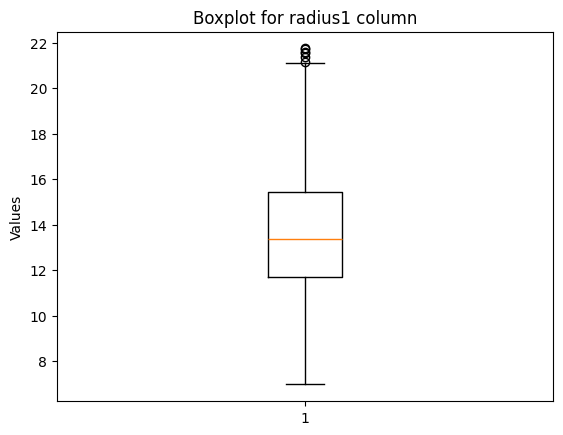

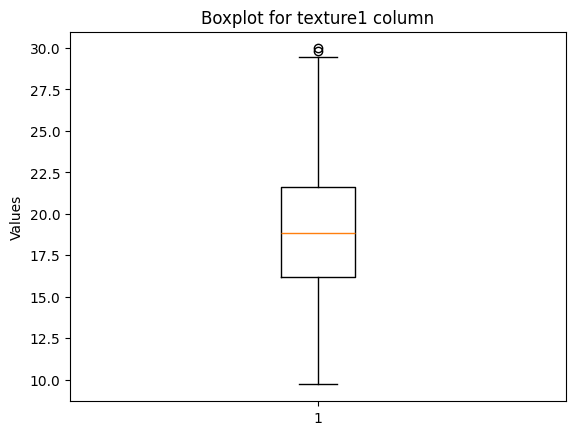

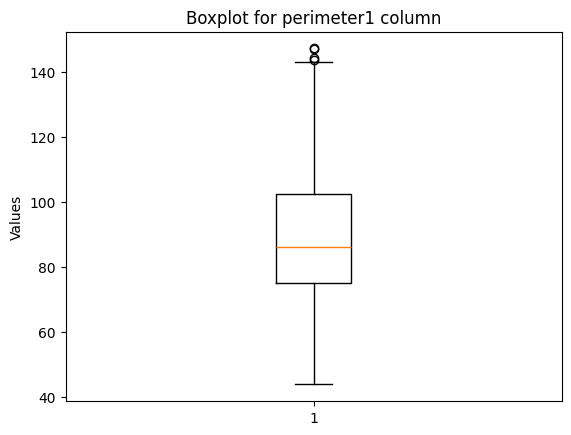

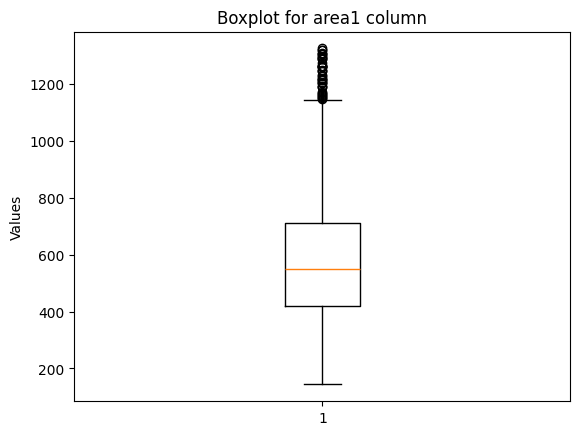

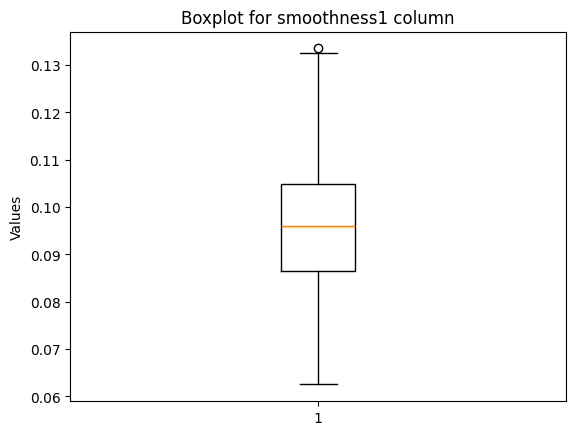

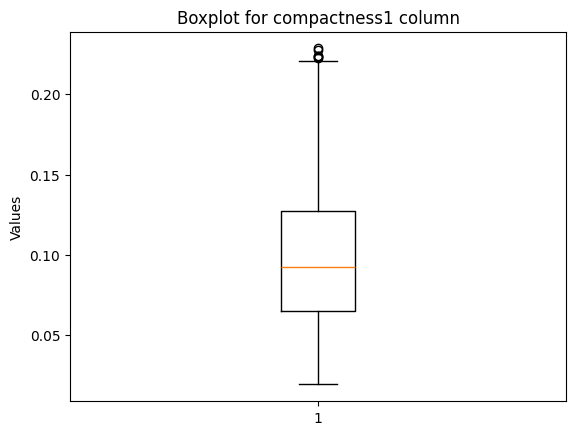

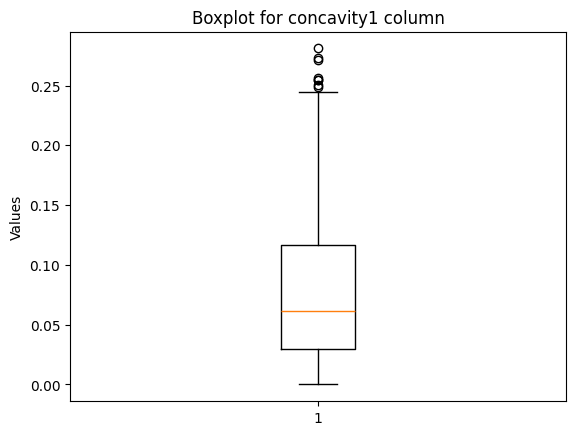

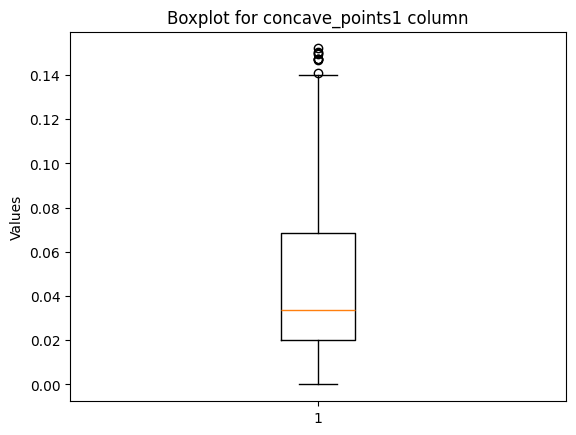

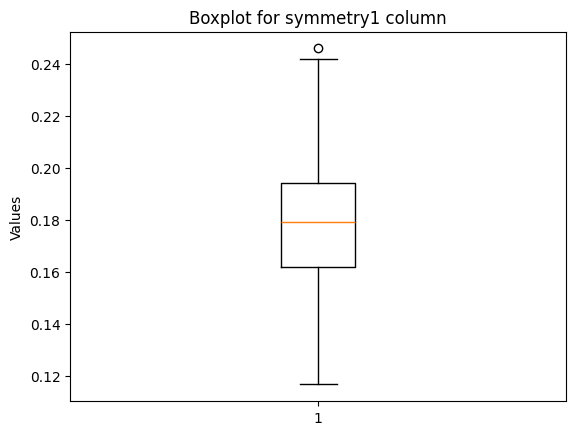

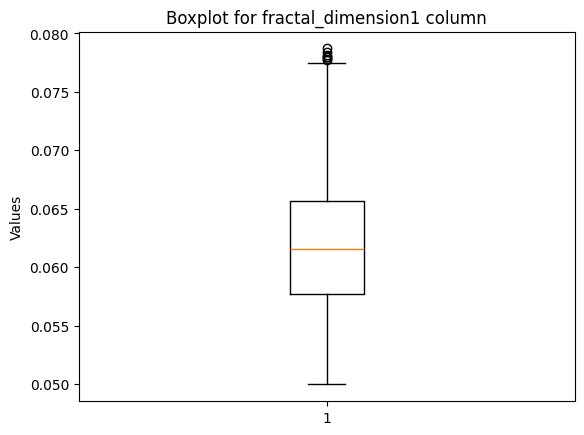

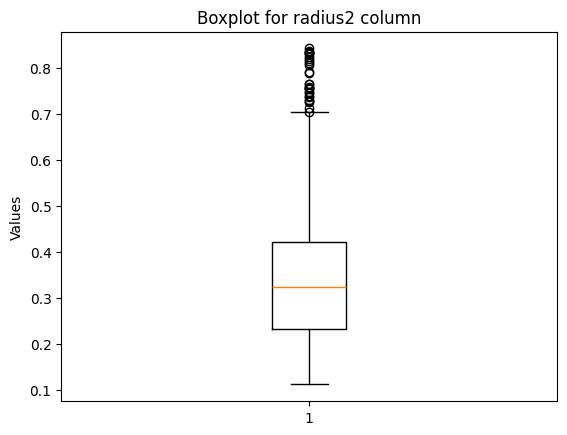

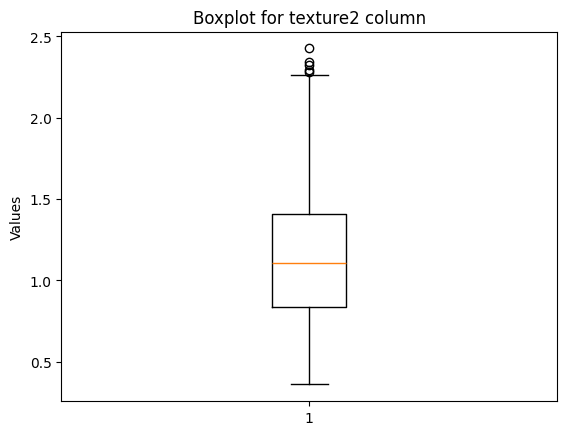

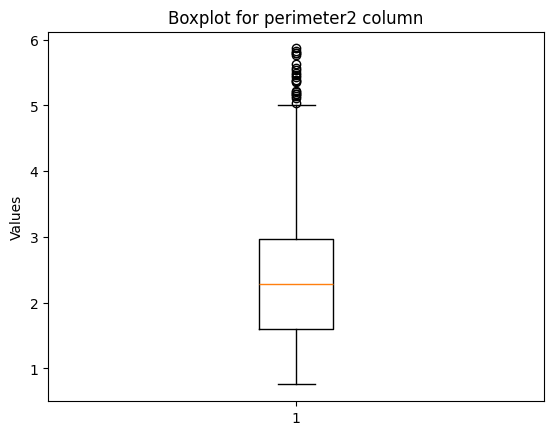

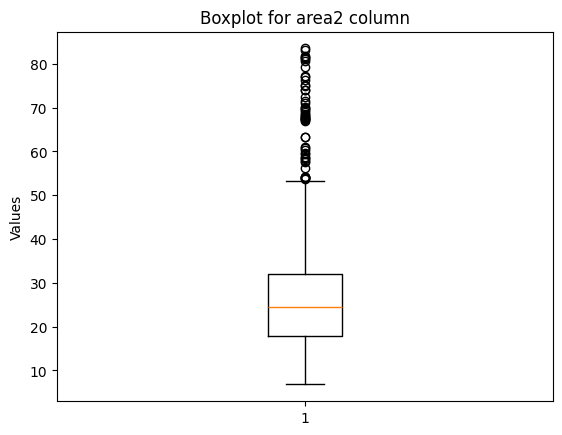

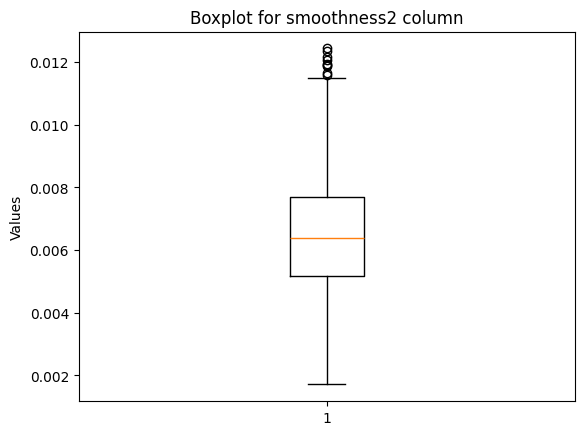

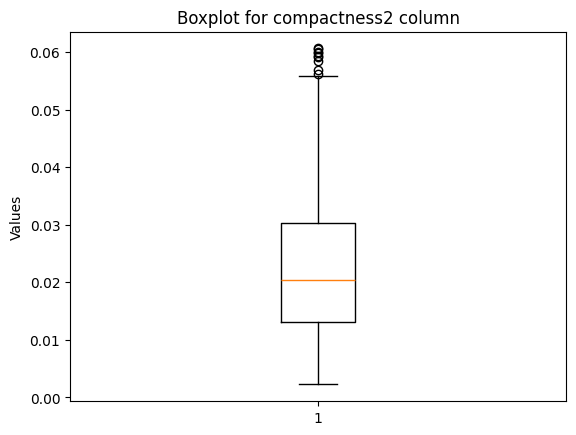

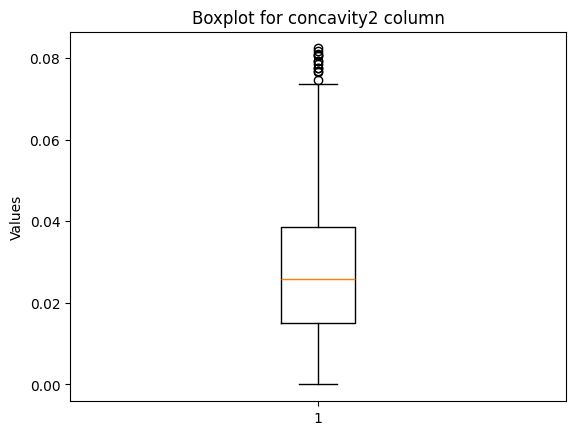

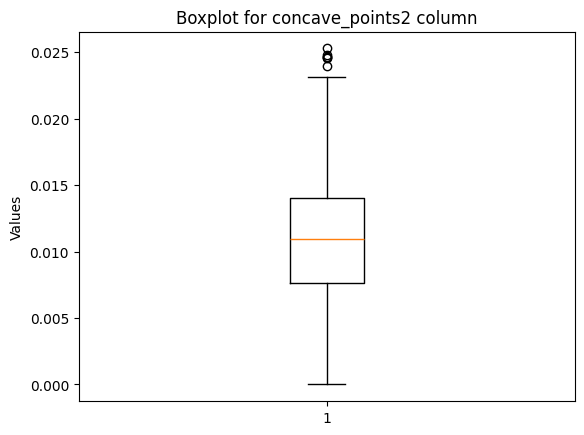

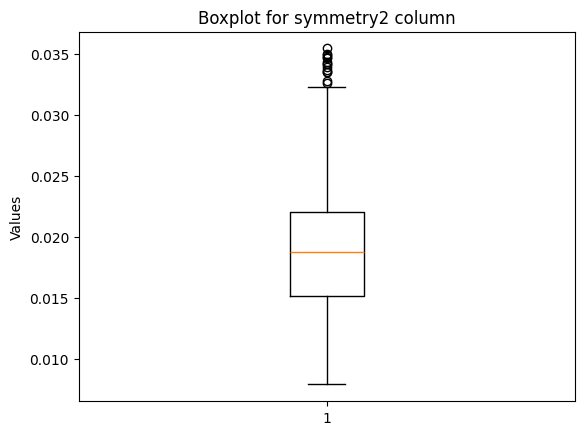

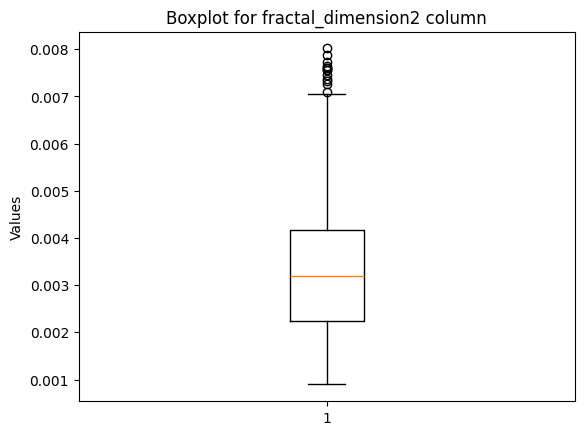

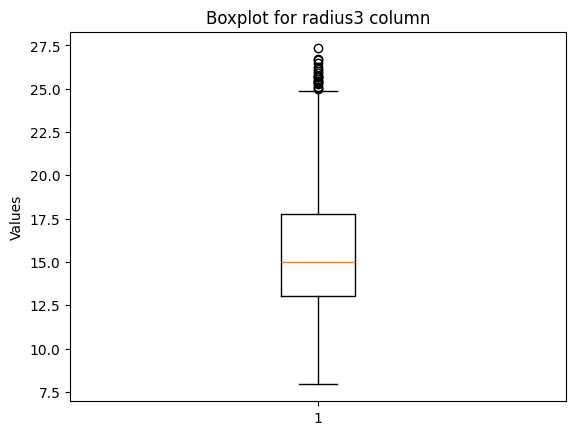

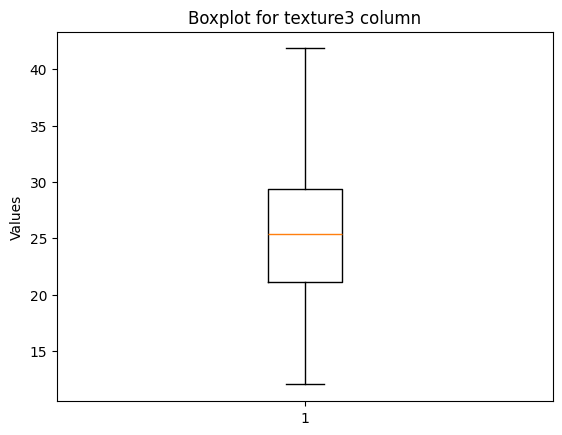

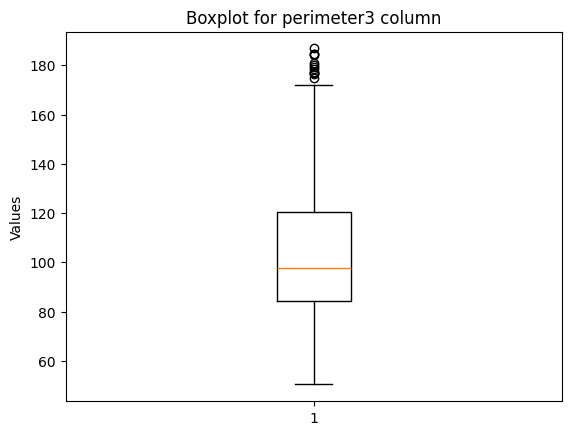

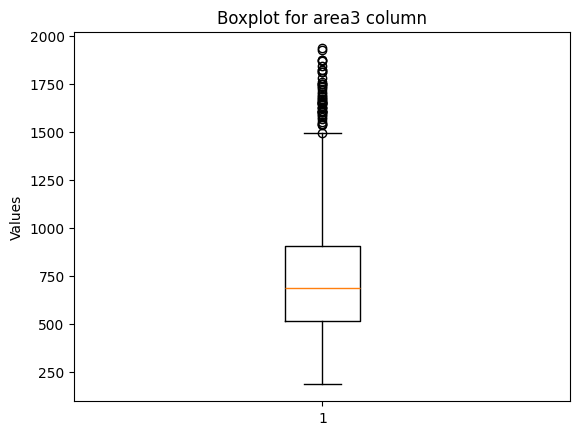

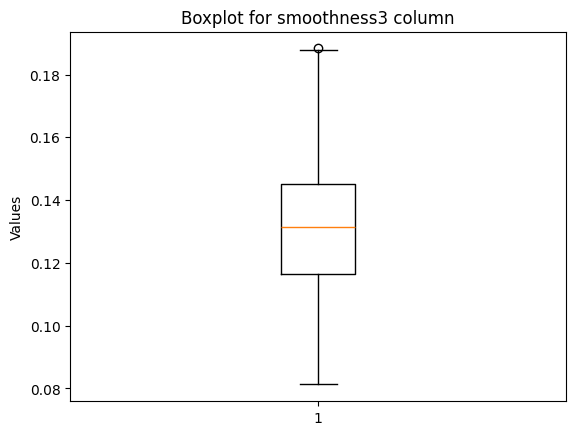

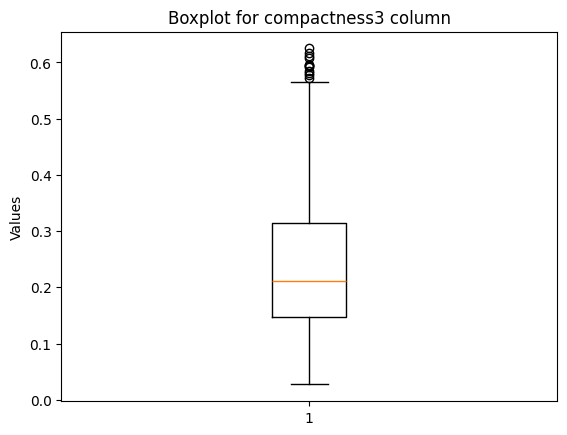

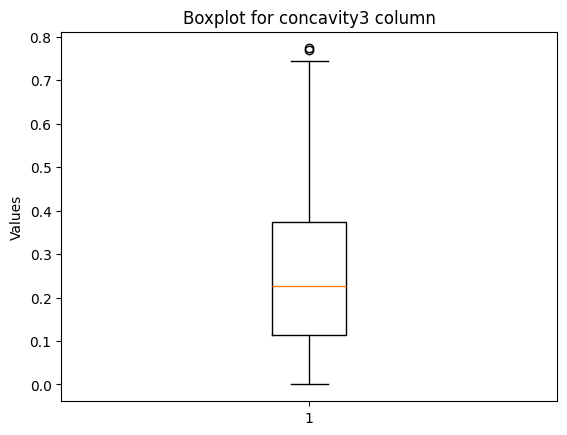

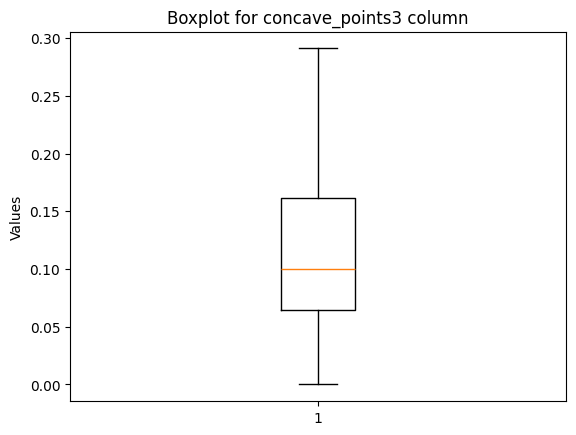

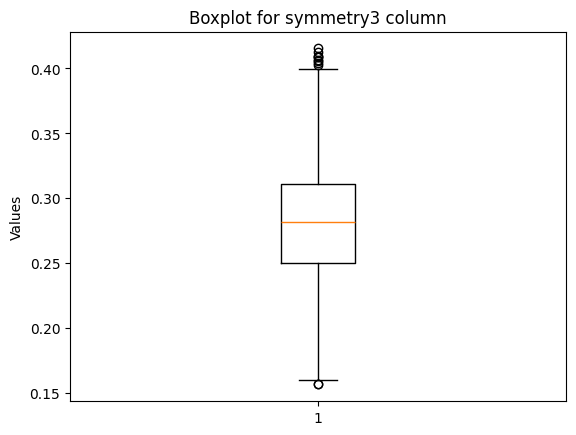

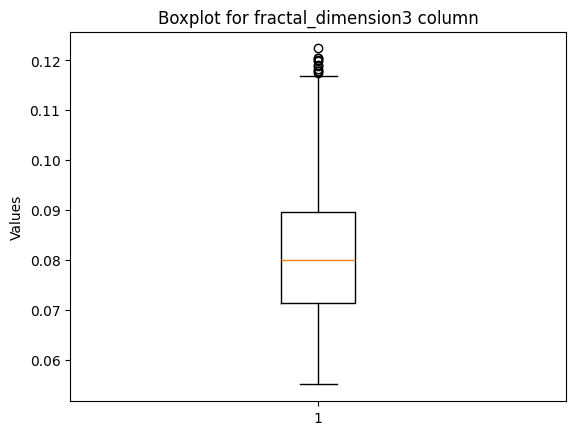

In [14]:
count = 0

for col in df.columns:
  if count == 30:
    break
  # Create boxplot
  plt.boxplot(df[col])

  # Add labels
  plt.title("Boxplot for " + col + " column")
  plt.ylabel("Values")

  # Show plot
  plt.show()

  count = count + 1

# **3) EDA**

## A) Univariate Analysis

In [15]:
# Statistics
df.describe()

radius1    texture1  perimeter1        area1  smoothness1  \
count  569.000000  569.000000  569.000000   569.000000   569.000000   
mean    13.865223   19.117847   90.235576   608.214890     0.096002   
std      3.098985    4.003516   21.397414   267.462401     0.013126   
min      6.981000    9.710000   43.790000   143.500000     0.062510   
25%     11.700000   16.170000   75.170000   420.300000     0.086410   
50%     13.370000   18.840000   86.240000   551.100000     0.095920   
75%     15.460000   21.600000  102.400000   710.600000     0.104900   
max     21.750000   29.970000  147.300000  1326.000000     0.133500   

       compactness1  concavity1  concave_points1   symmetry1  \
count    569.000000  569.000000       569.000000  569.000000   
mean       0.099594    0.080551         0.046656    0.179200   
std        0.044533    0.064891         0.034856    0.023715   
min        0.019380    0.000000         0.000000    0.116700   
25%        0.064920    0.029560         0.020310    0.162000   
50%        0.092630    0.061540         0.033500    0.179200   
75%        0.127500    0.116800         0.068470    0.194300   
max        0.228400    0.281000         0.152000    0.245900   

       fractal_dimension1  ...     radius3    texture3  perimeter3  \
count          569.000000  ...  569.000000  569.000000  569.000000   
mean             0.062167  ...   15.836611   25.497465  104.522256   
std              0.005841  ...    4.137642    5.837784   29.068300   
min              0.049960  ...    7.930000   12.020000   50.410000   
25%              0.057700  ...   13.010000   21.080000   84.110000   
50%              0.061540  ...   14.970000   25.410000   97.660000   
75%              0.065690  ...   17.790000   29.410000  120.300000   
max              0.078710  ...   27.320000   41.850000  186.800000   

             area3  smoothness3  compactness3  concavity3  concave_points3  \
count   569.000000   569.000000    569.000000  569.000000       569.000000   
mean    778.653184     0.131698      0.238973    0.257621         0.114606   
std     385.536111     0.021360      0.127615    0.182286         0.065732   
min     185.200000     0.081250      0.027290    0.000000         0.000000   
25%     515.300000     0.116600      0.147200    0.114500         0.064930   
50%     686.500000     0.131400      0.211900    0.226700         0.099930   
75%     906.600000     0.145100      0.315000    0.372800         0.161400   
max    1933.000000     0.188300      0.624700    0.772700         0.291000   

        symmetry3  fractal_dimension3  
count  569.000000          569.000000  
mean     0.282075            0.081596  
std      0.046602            0.013652  
min      0.156500            0.055040  
25%      0.250400            0.071460  
50%      0.282075            0.080040  
75%      0.310900            0.089600  
max      0.415400            0.122400  

[8 rows x 30 columns]

In [16]:
# Target Value Counts
target_df = pd.Series(df["Diagnosis"], name='target')
target_df.value_counts(normalize=True)

target
B    0.627417
M    0.372583
Name: proportion, dtype: float64

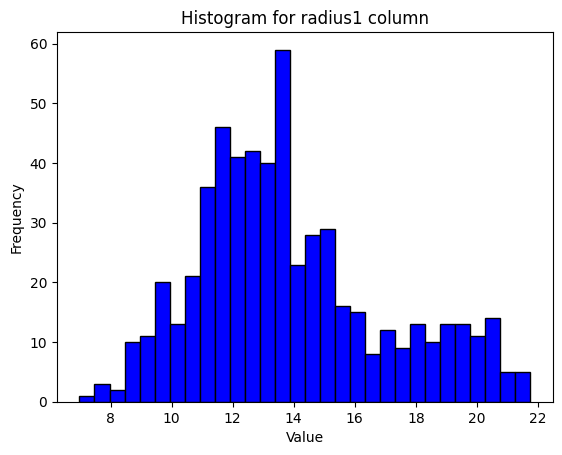

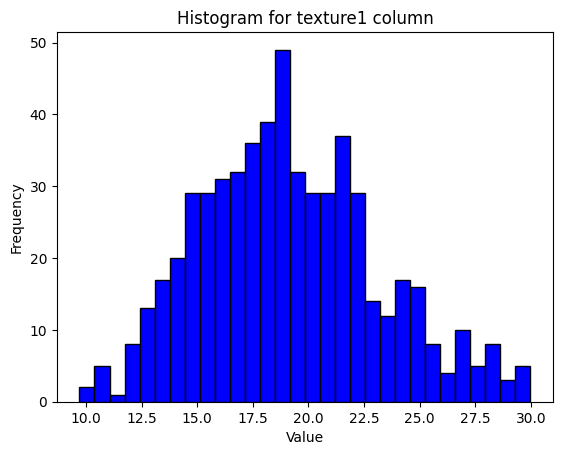

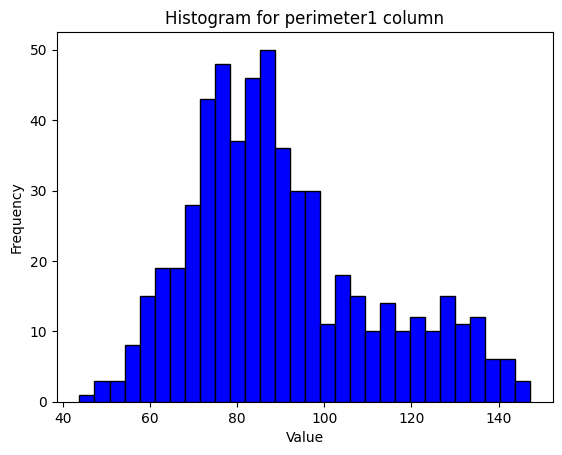

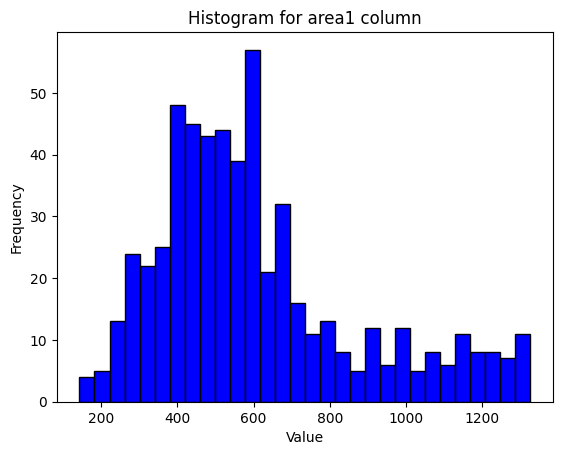

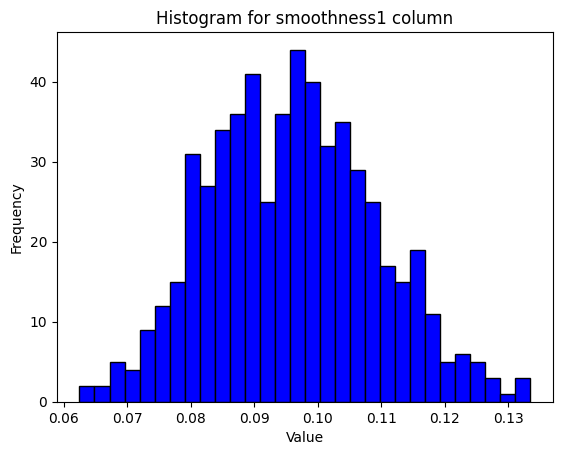

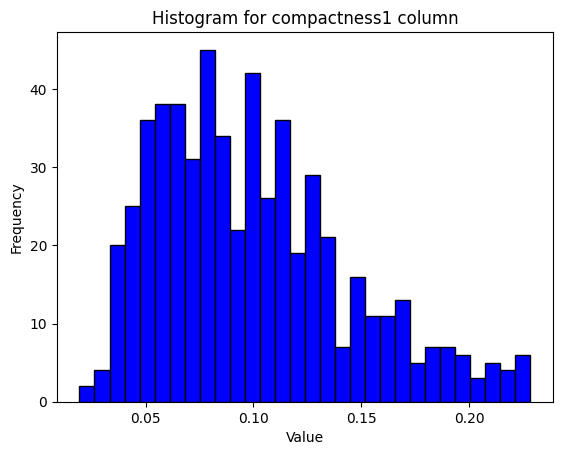

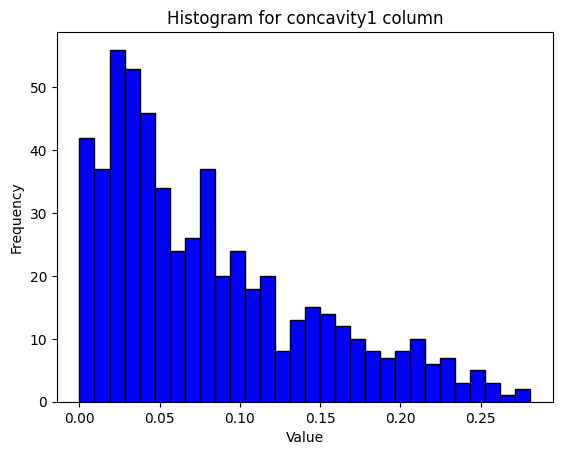

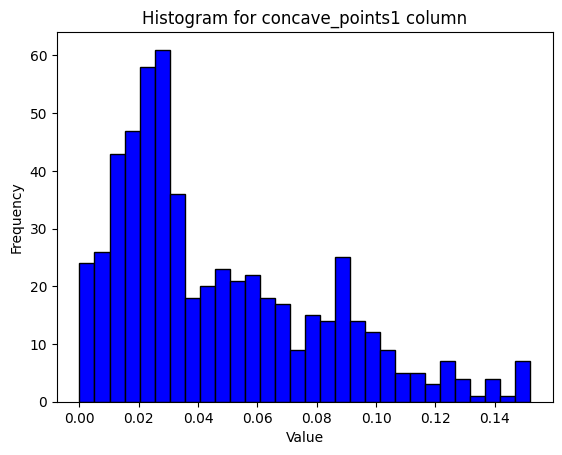

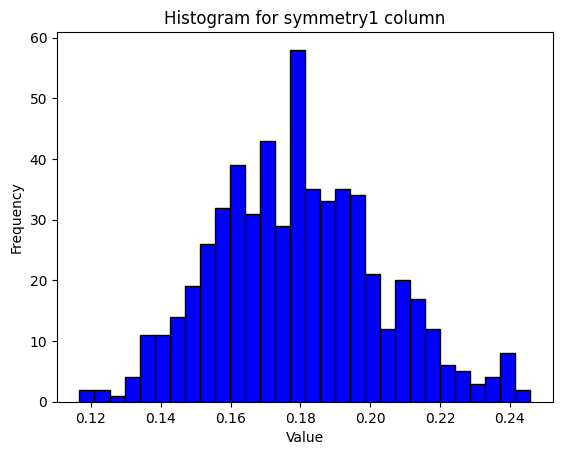

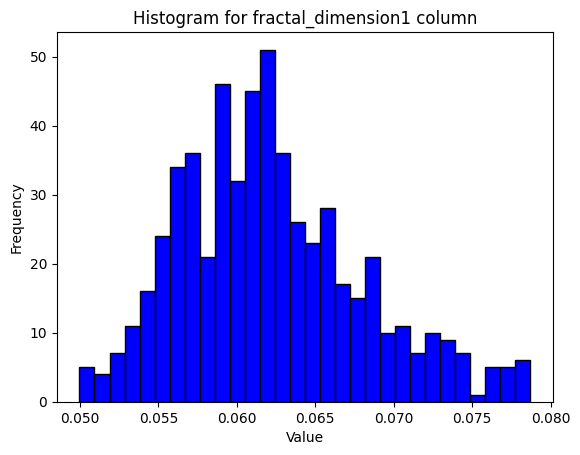

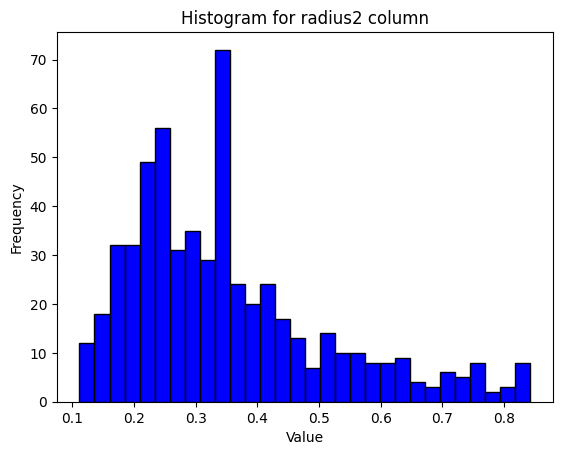

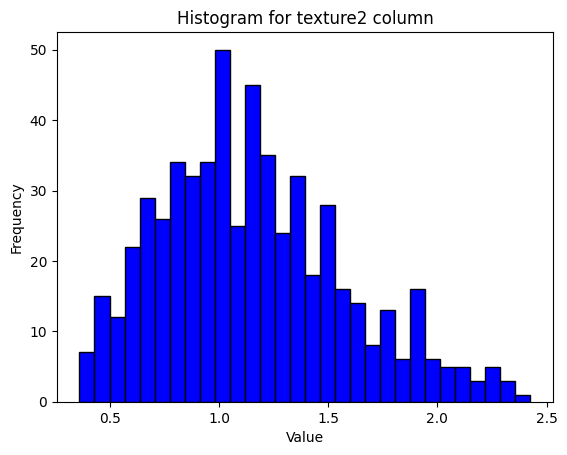

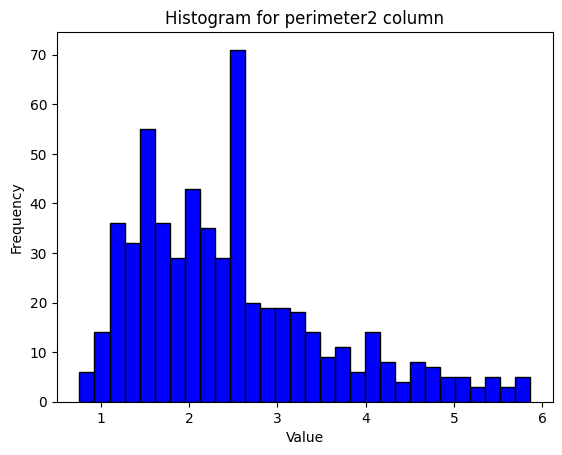

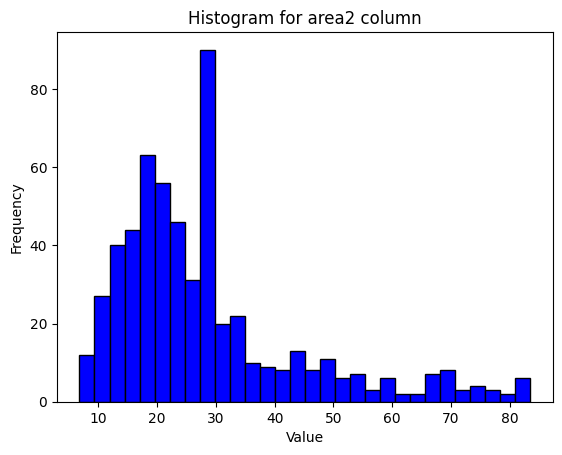

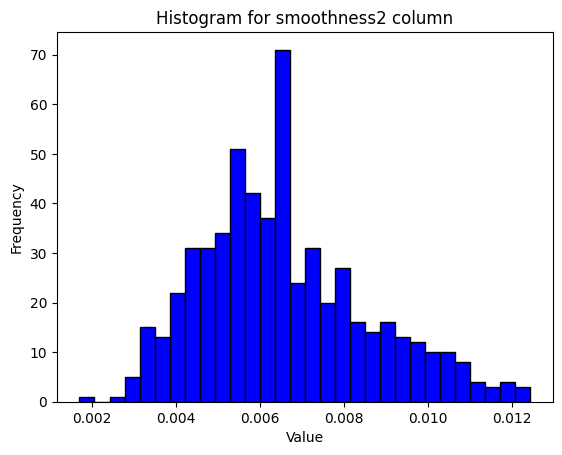

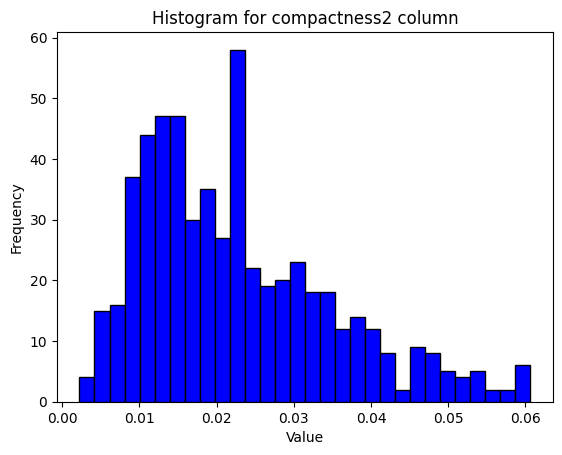

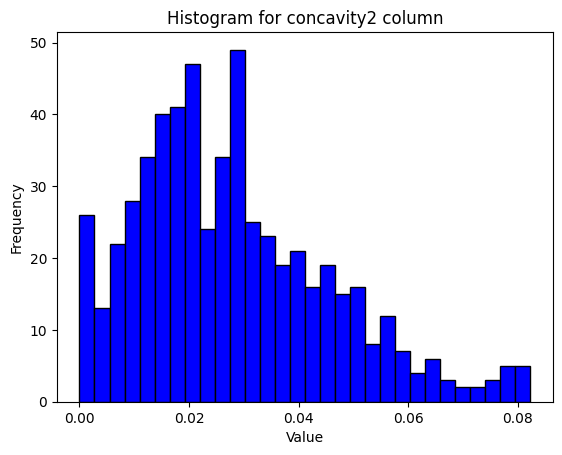

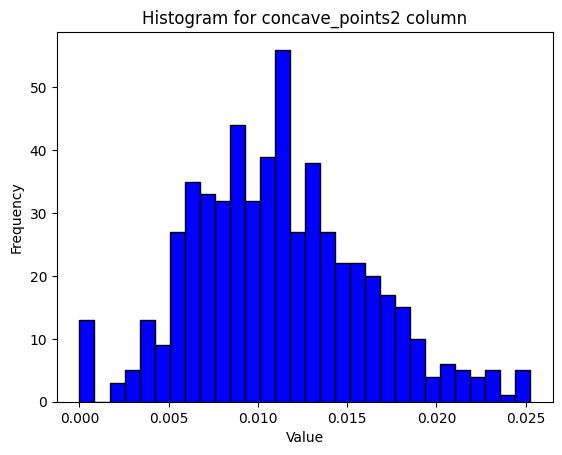

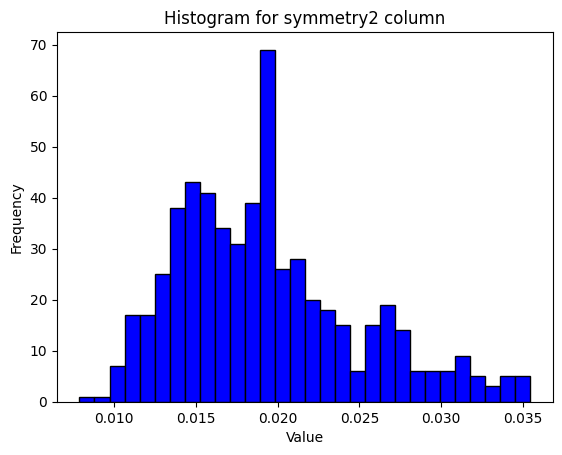

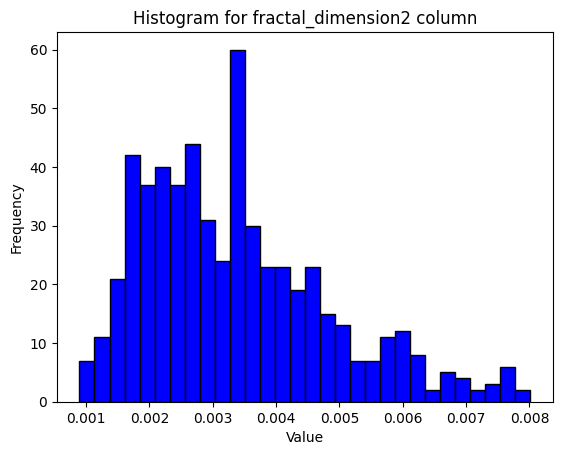

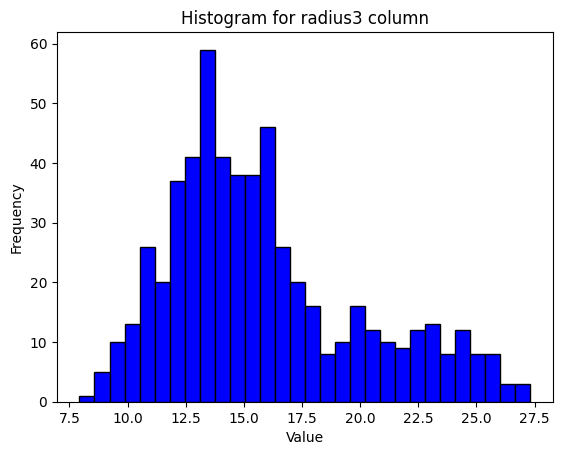

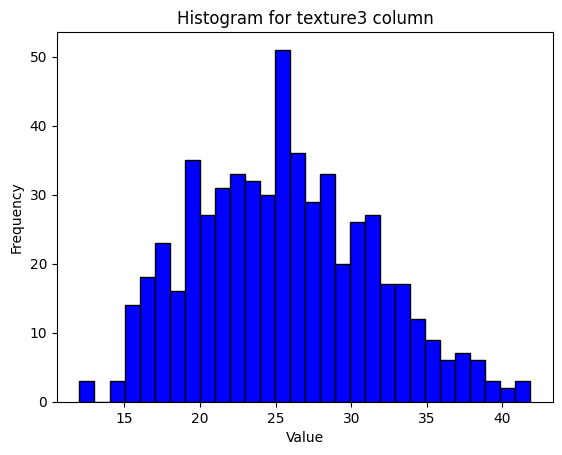

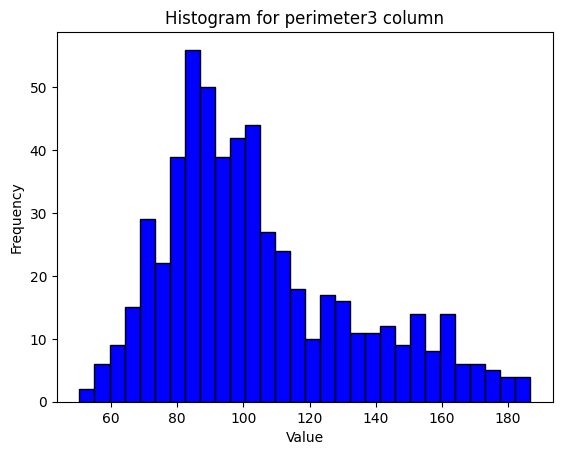

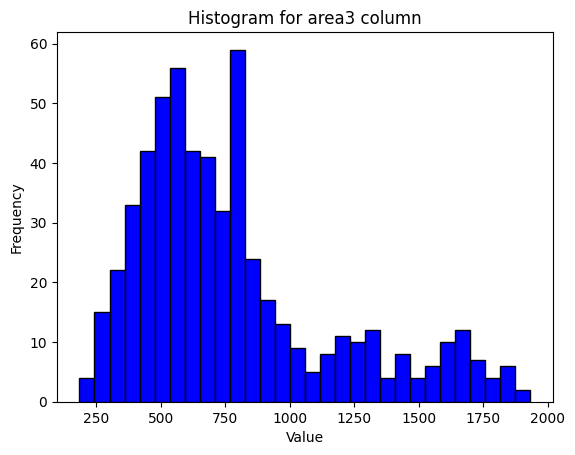

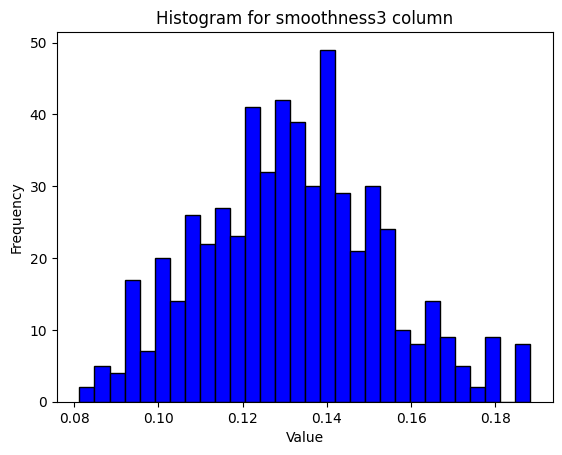

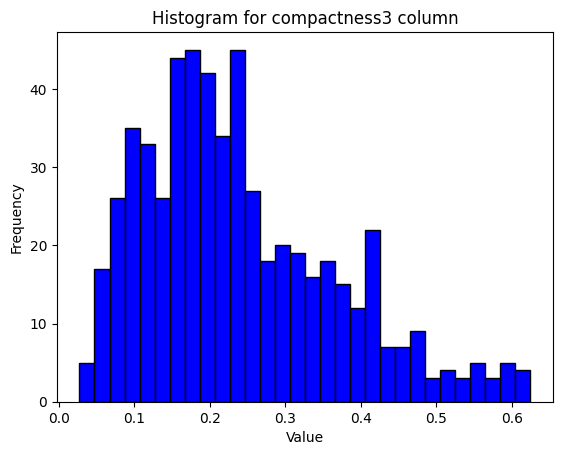

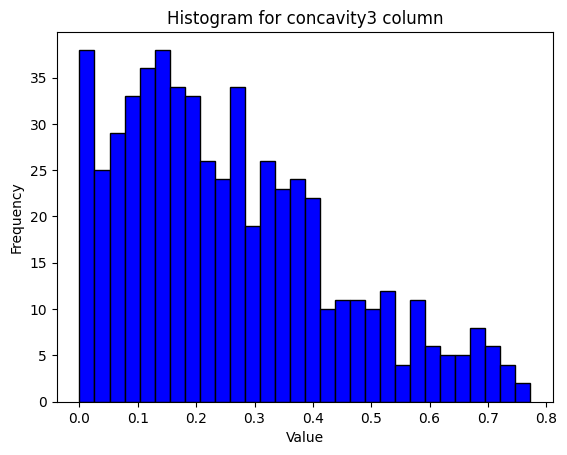

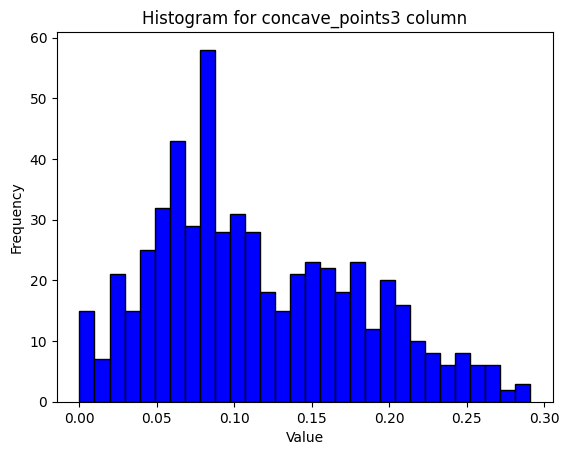

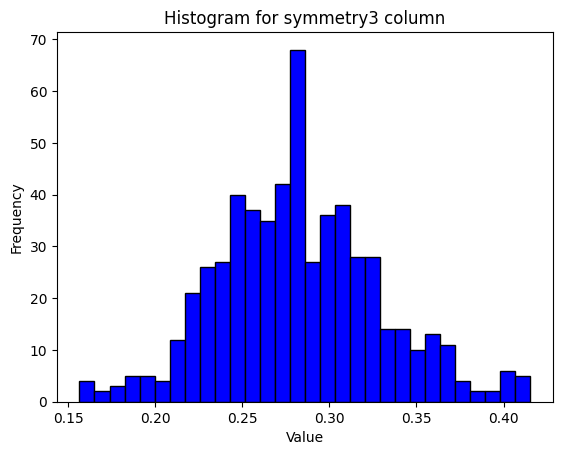

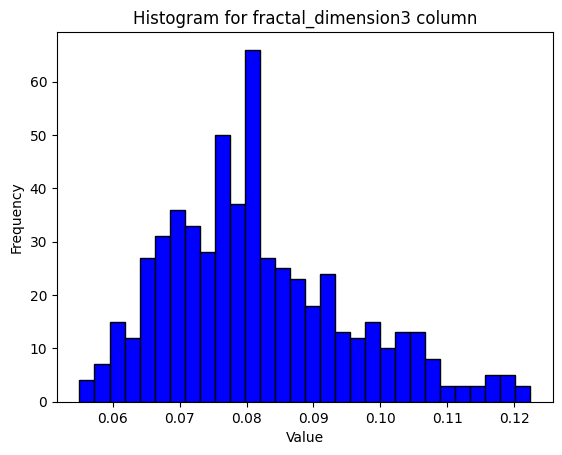

In [17]:
# Distrubtion Of Featuers

for col in df.columns:
  if ((df[col].dtype) == "int64") or ((df[col].dtype) == "float64"):
    # Plot histogram
    plt.hist(df[col], bins=30, color='blue', edgecolor='black')

    # Add labels
    plt.title("Histogram for " + col + " column")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

    # Show plot
    plt.show()

Text(0, 0.5, 'Frequency')

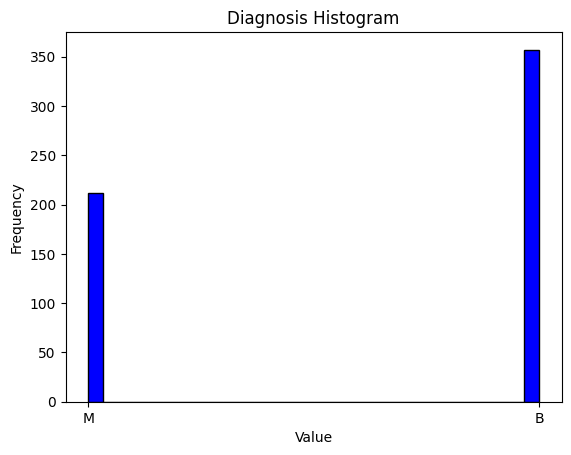

In [18]:
# Target Value Distrubtion

# Plot histogram
plt.hist(df["Diagnosis"], bins=30, color='blue', edgecolor='black')

# Add labels
plt.title("Diagnosis Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

<ipython-input-19-4ed8037e262e>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


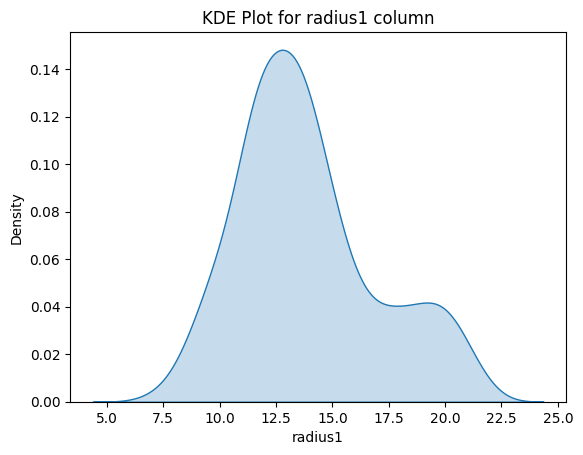

<ipython-input-19-4ed8037e262e>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


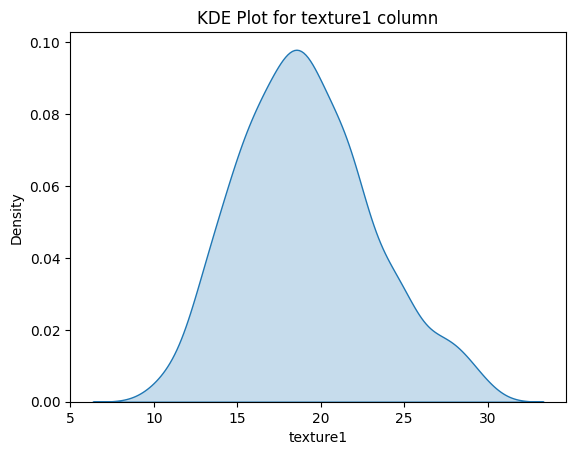

<ipython-input-19-4ed8037e262e>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


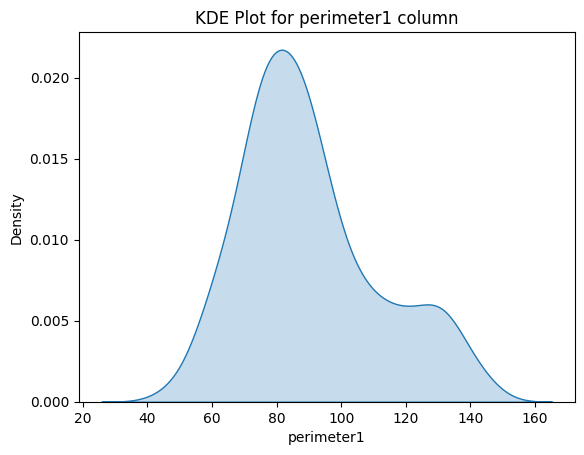

<ipython-input-19-4ed8037e262e>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


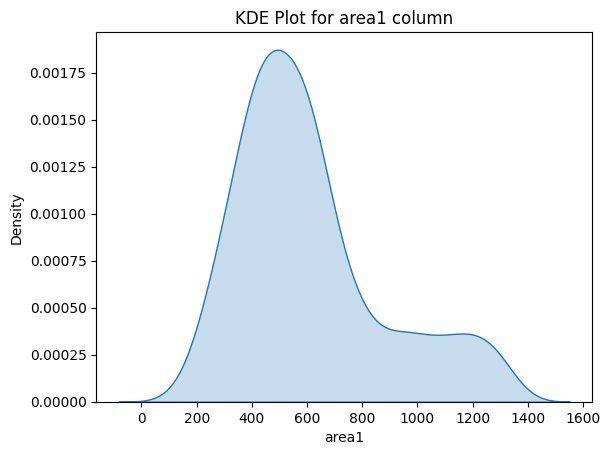

<ipython-input-19-4ed8037e262e>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


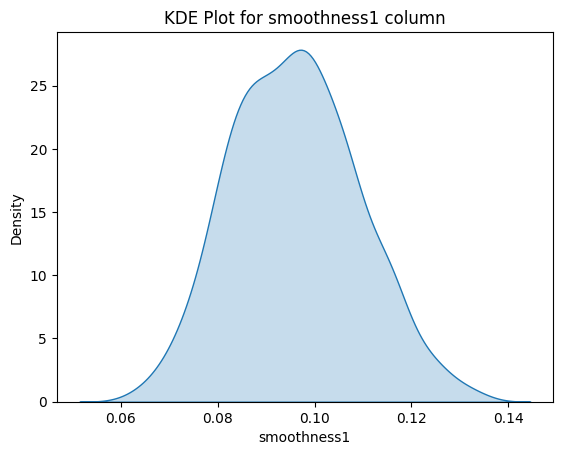

<ipython-input-19-4ed8037e262e>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


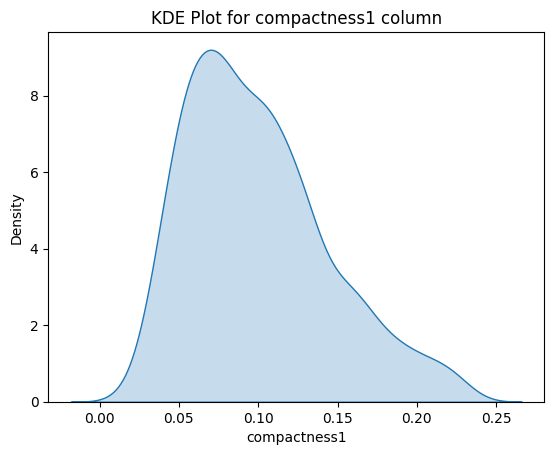

<ipython-input-19-4ed8037e262e>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


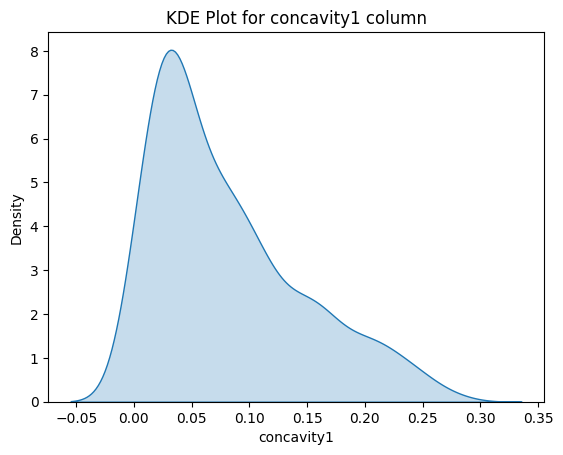

<ipython-input-19-4ed8037e262e>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


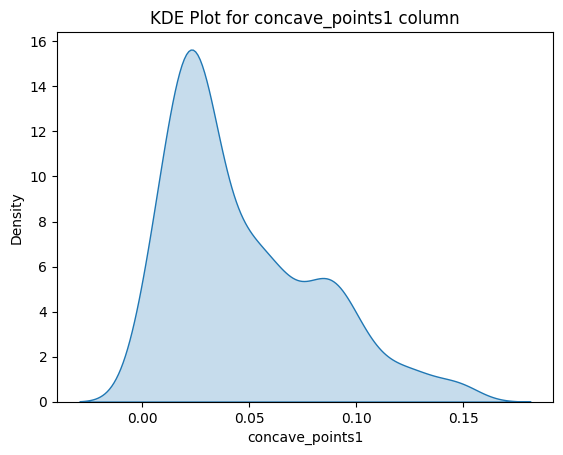

<ipython-input-19-4ed8037e262e>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


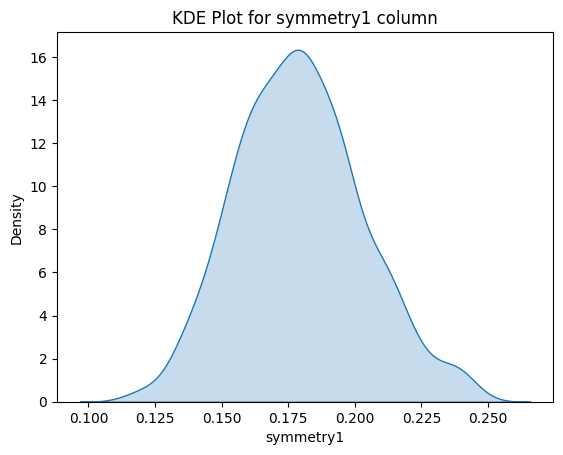

<ipython-input-19-4ed8037e262e>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


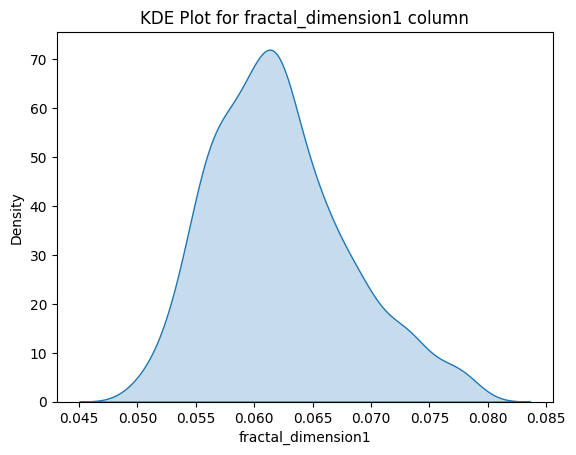

<ipython-input-19-4ed8037e262e>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


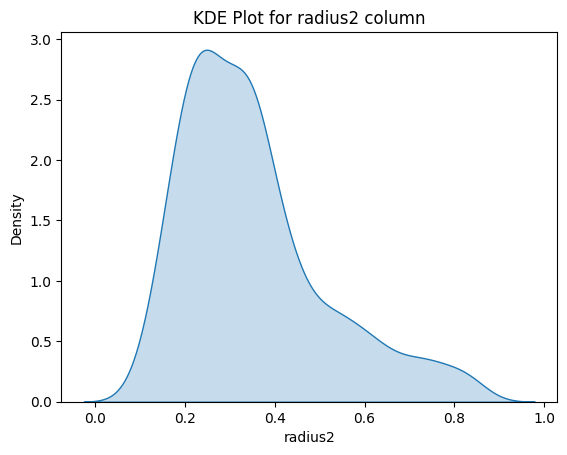

<ipython-input-19-4ed8037e262e>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


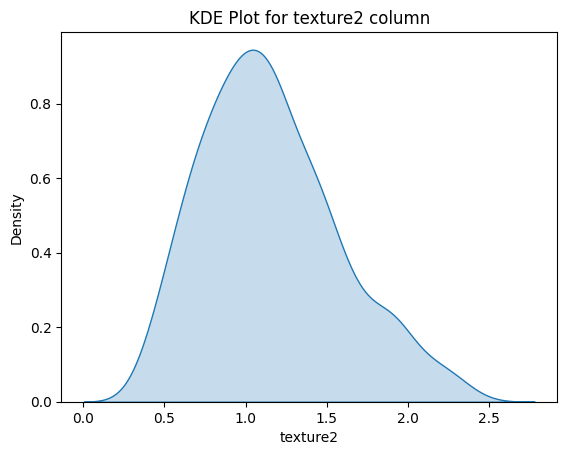

<ipython-input-19-4ed8037e262e>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


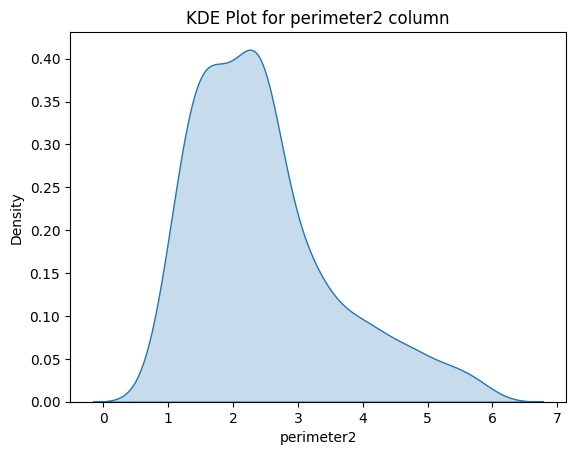

<ipython-input-19-4ed8037e262e>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


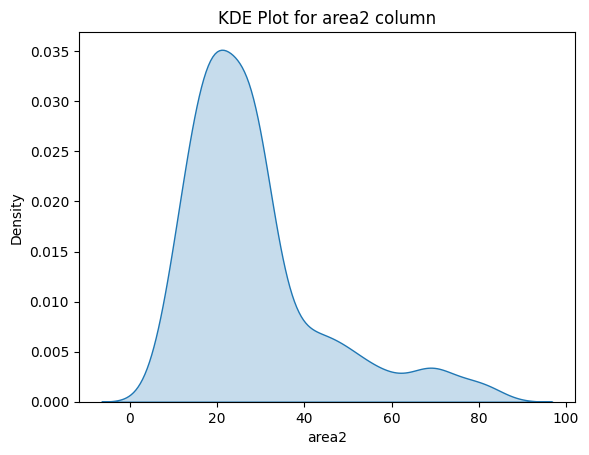

<ipython-input-19-4ed8037e262e>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


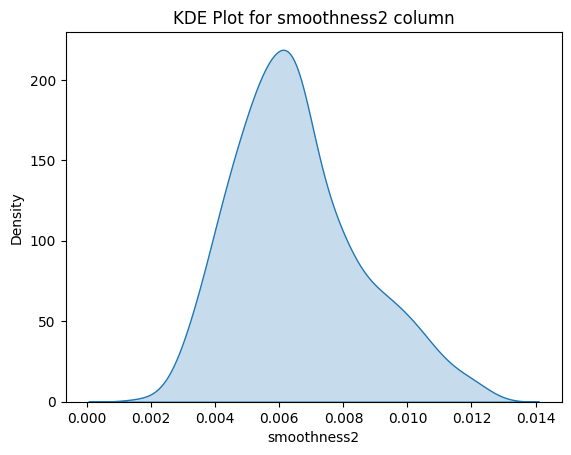

<ipython-input-19-4ed8037e262e>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


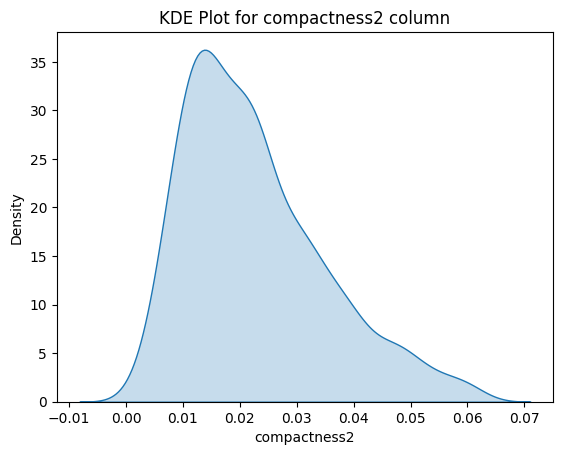

<ipython-input-19-4ed8037e262e>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


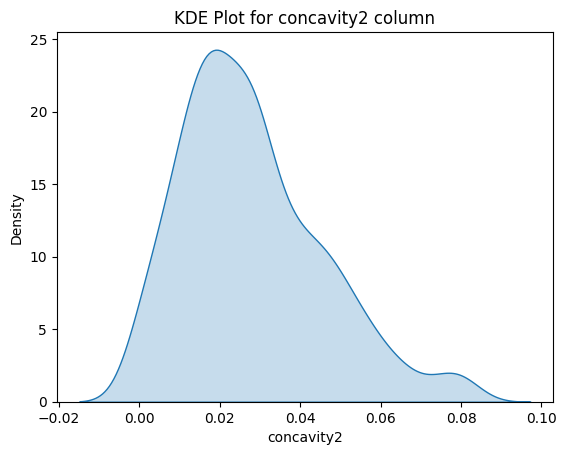

<ipython-input-19-4ed8037e262e>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


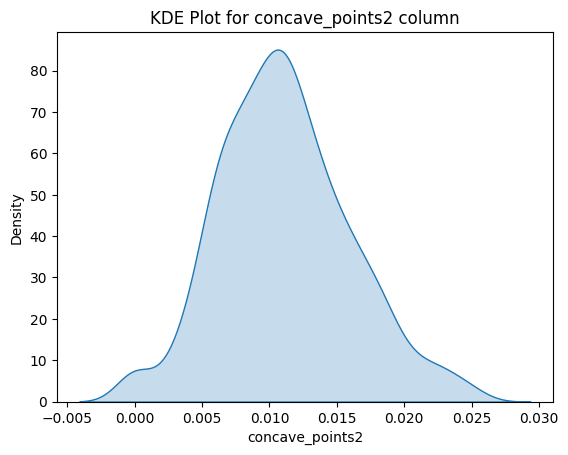

<ipython-input-19-4ed8037e262e>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


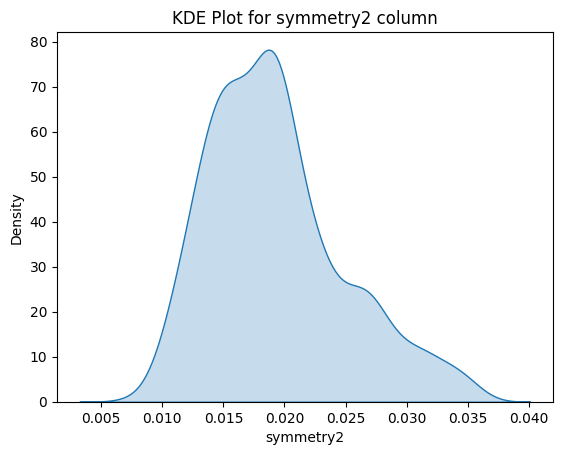

<ipython-input-19-4ed8037e262e>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


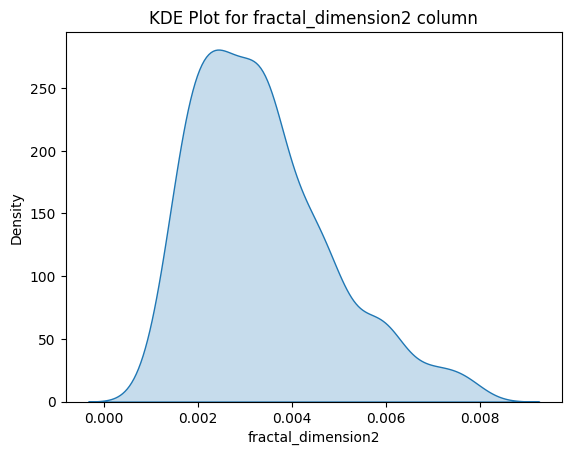

<ipython-input-19-4ed8037e262e>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


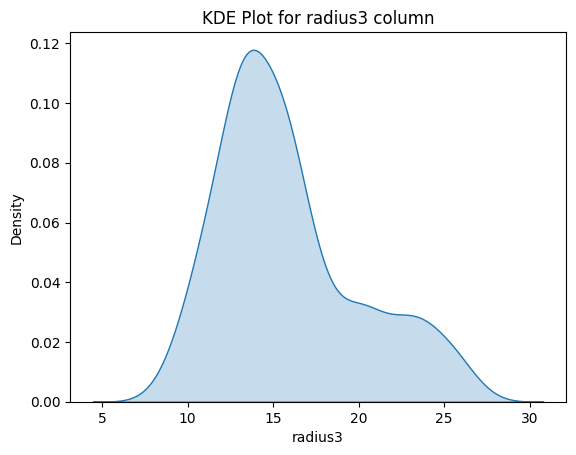

<ipython-input-19-4ed8037e262e>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


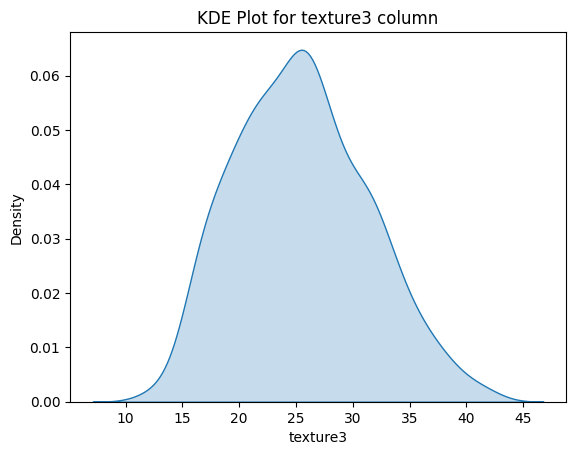

<ipython-input-19-4ed8037e262e>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


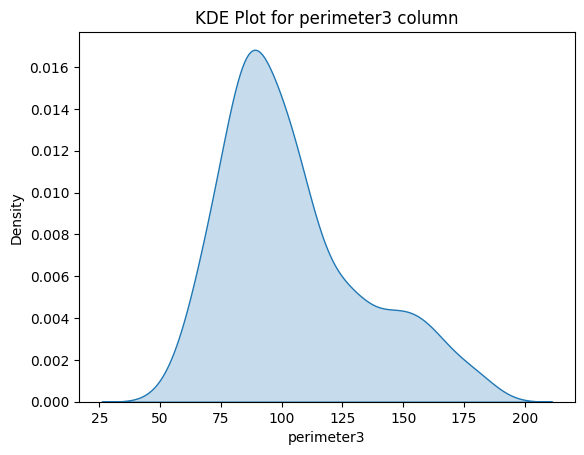

<ipython-input-19-4ed8037e262e>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


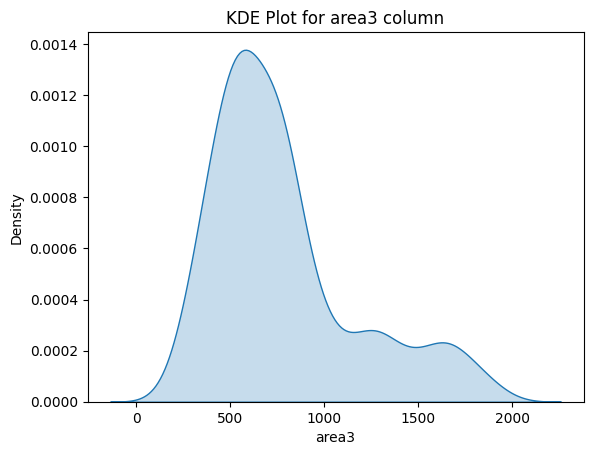

<ipython-input-19-4ed8037e262e>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


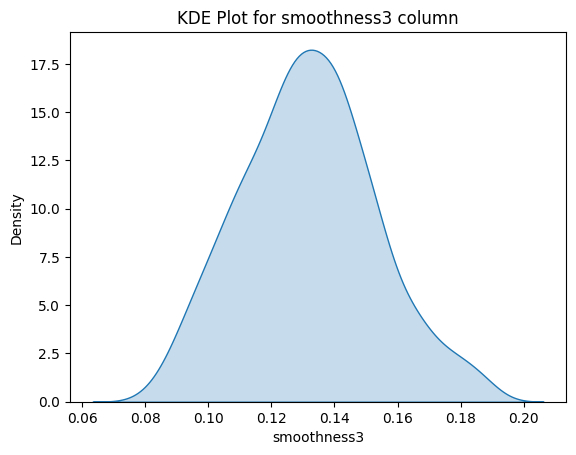

<ipython-input-19-4ed8037e262e>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


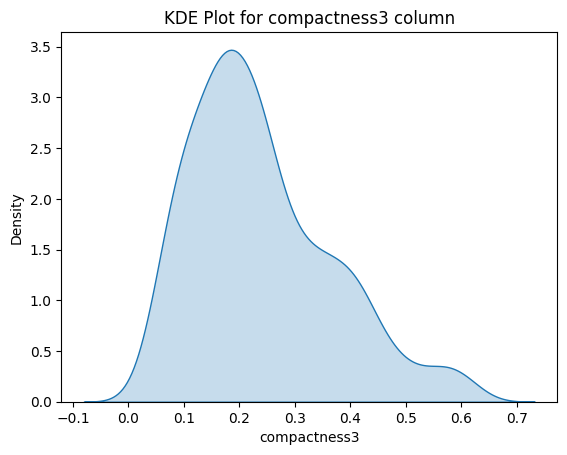

<ipython-input-19-4ed8037e262e>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


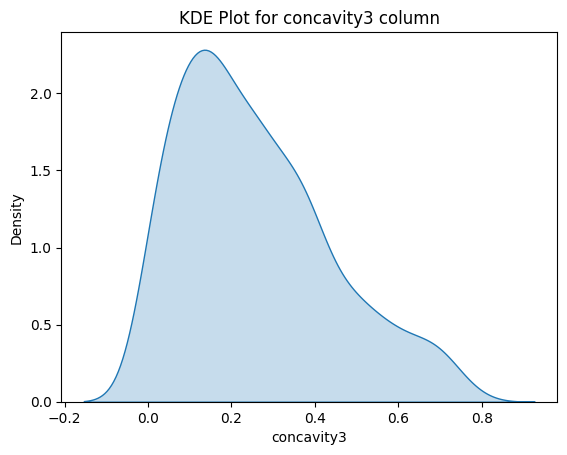

<ipython-input-19-4ed8037e262e>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


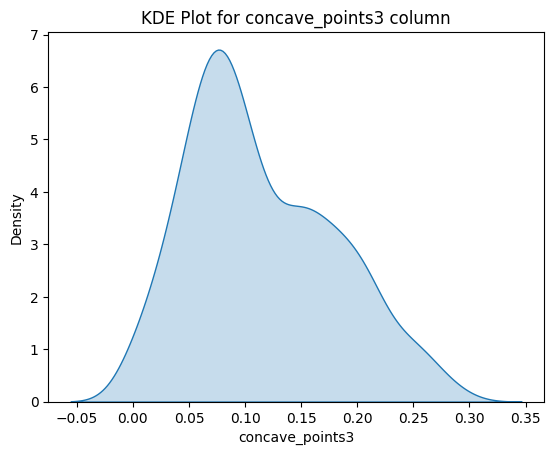

<ipython-input-19-4ed8037e262e>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


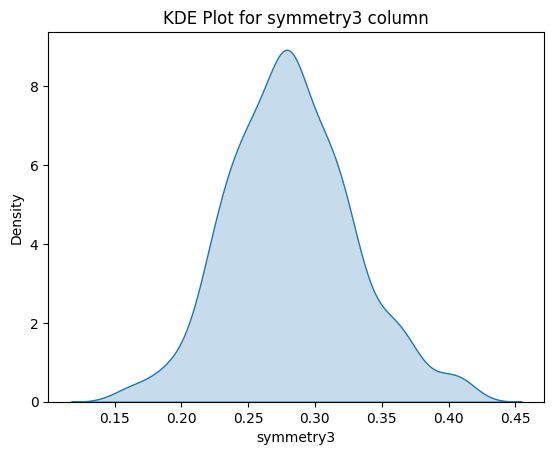

<ipython-input-19-4ed8037e262e>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


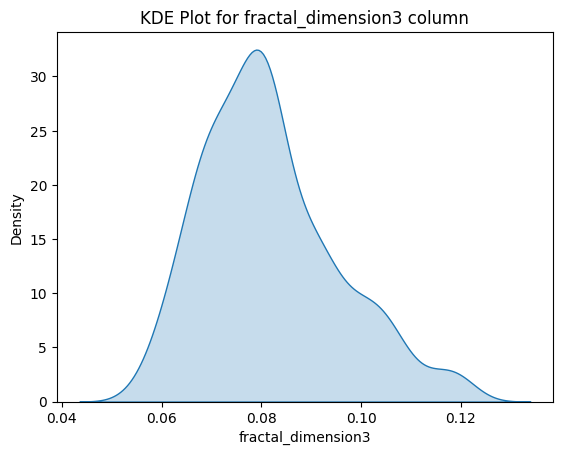

In [19]:
# Distrubtion Of Featuers

count = 0
for col in df.columns:

  if count == 30:
    break
  sns.kdeplot(df[col], shade=True)
  plt.title('KDE Plot for ' + col + ' column')
  plt.show()
  count = count + 1

In [20]:
# Skewness & Kurtosis
count = 0
for col in df.columns:
  if count == 30:
    break
  print("Skewness for " , col , " column: ", df[col].skew())
  print("Kurtosis for" , col, "column: " , df[col].kurt())
  print("\n")
  count = count + 1

Skewness for  radius1  column:  0.6134843079828243
Kurtosis for radius1 column:  -0.2141725684757243


Skewness for  texture1  column:  0.36172778295194064
Kurtosis for texture1 column:  -0.2151721992444764


Skewness for  perimeter1  column:  0.6497126382591669
Kurtosis for perimeter1 column:  -0.19618091167306995


Skewness for  area1  column:  0.9828829210276415
Kurtosis for area1 column:  0.2934745546405484


Skewness for  smoothness1  column:  0.19173051937470925
Kurtosis for smoothness1 column:  -0.3033314104246747


Skewness for  compactness1  column:  0.7422037875119138
Kurtosis for compactness1 column:  0.021572020336925846


Skewness for  concavity1  column:  0.9401647692662893
Kurtosis for concavity1 column:  0.05047336565978844


Skewness for  concave_points1  column:  0.9308990174804601
Kurtosis for concave_points1 column:  0.11816953012981246


Skewness for  symmetry1  column:  0.2504335056606253
Kurtosis for symmetry1 column:  -0.10983612797414466


Skewness for  fractal

## B) Bivariate/Multivariate Analysis

In [21]:
# Drop object column
df_numeric = df.drop(columns=['Diagnosis'])

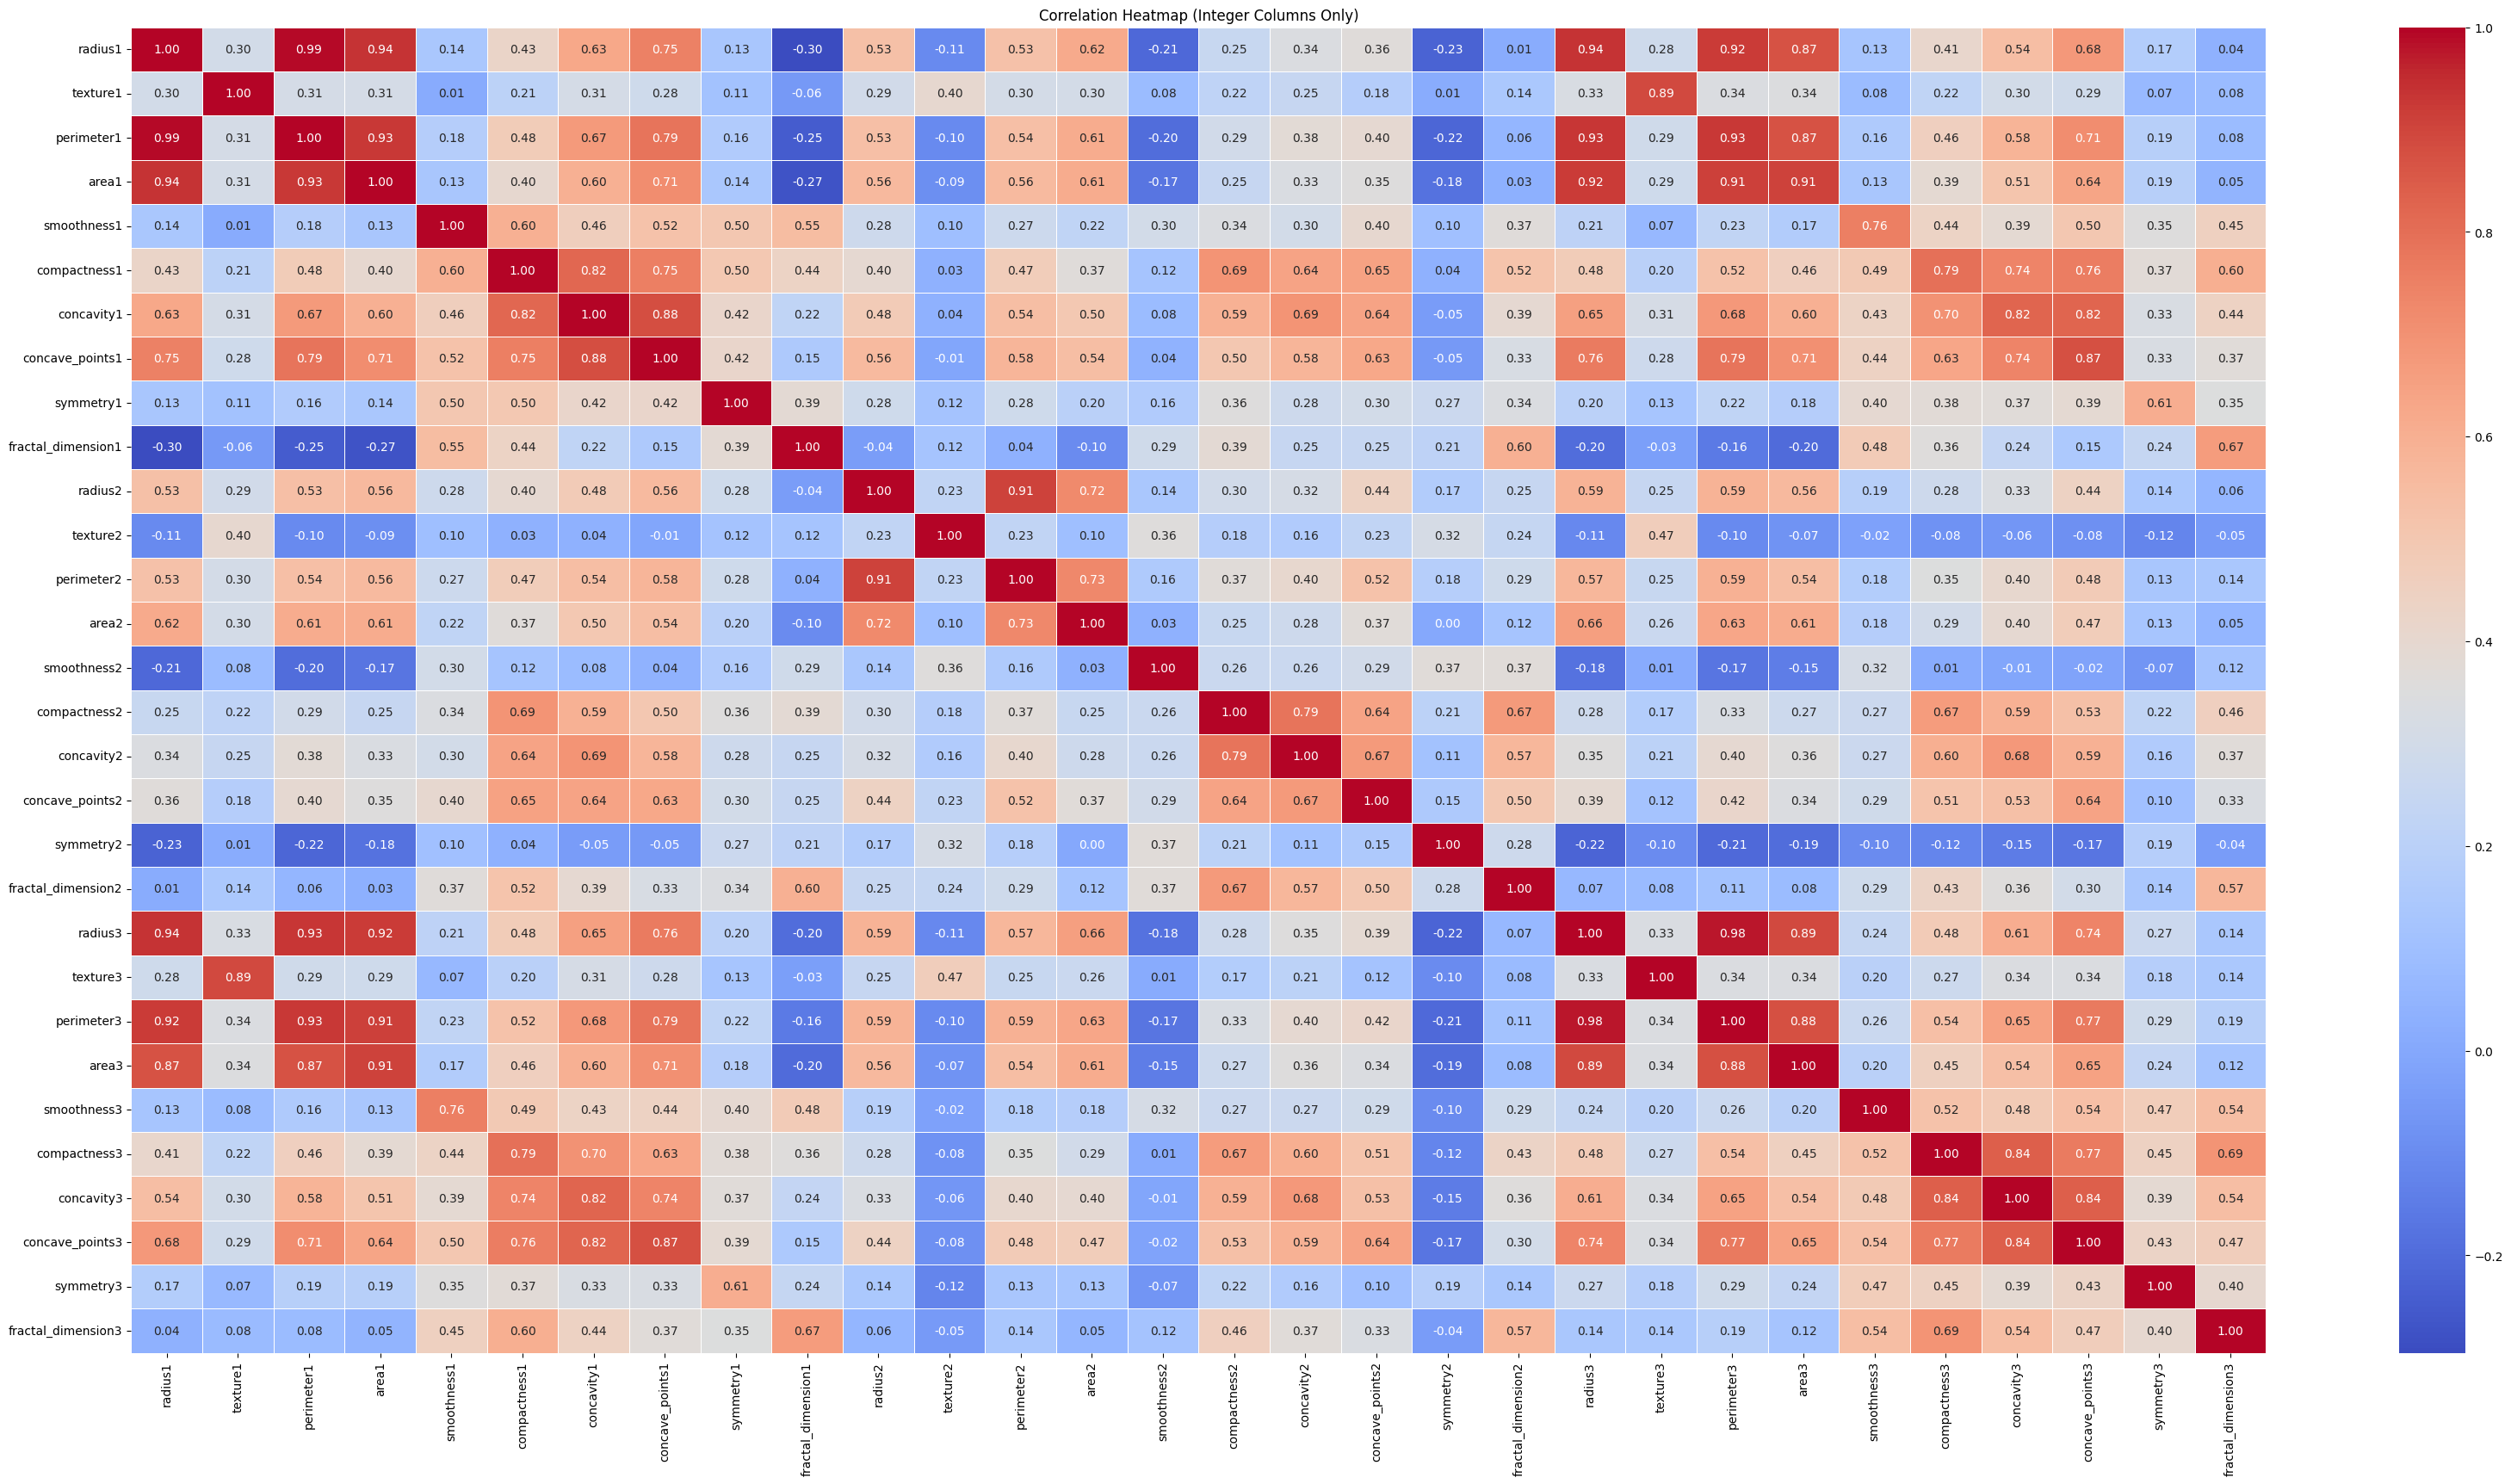

In [22]:
# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(40, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show plot
plt.title("Correlation Heatmap (Integer Columns Only)")
plt.show()

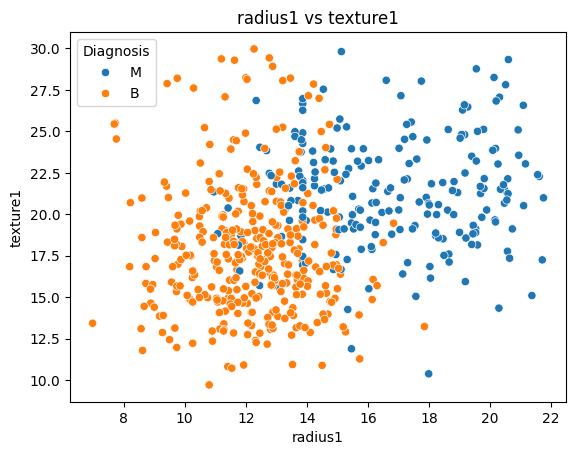

In [23]:
# Relationship between radius1 and texture1 column
sns.scatterplot(x='radius1', y='texture1', hue=df["Diagnosis"], data=df)
plt.title('radius1 vs texture1')
plt.show()

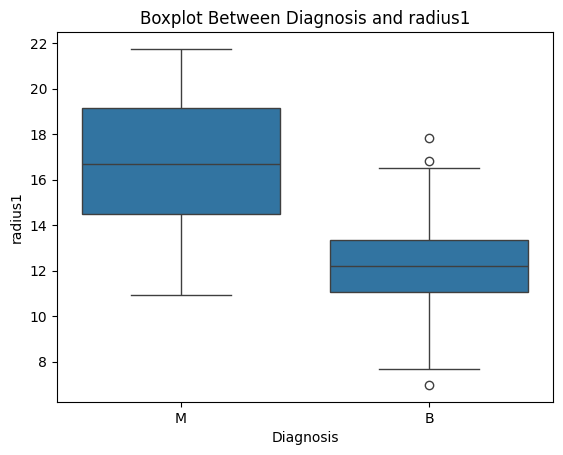

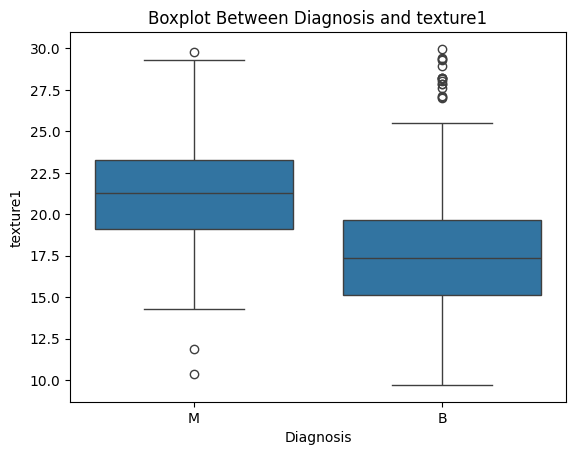

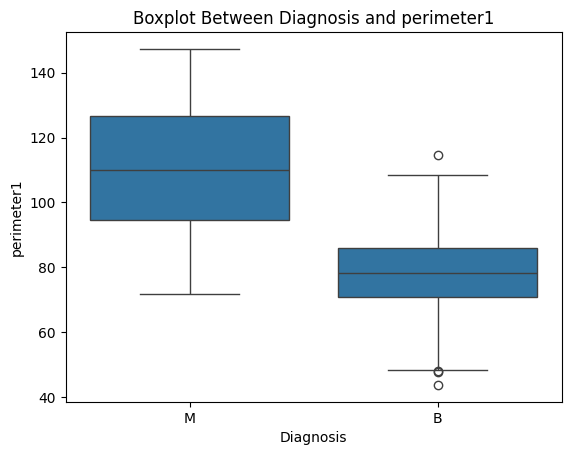

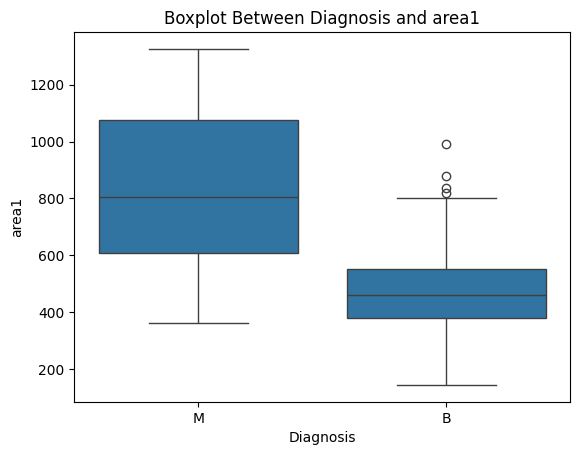

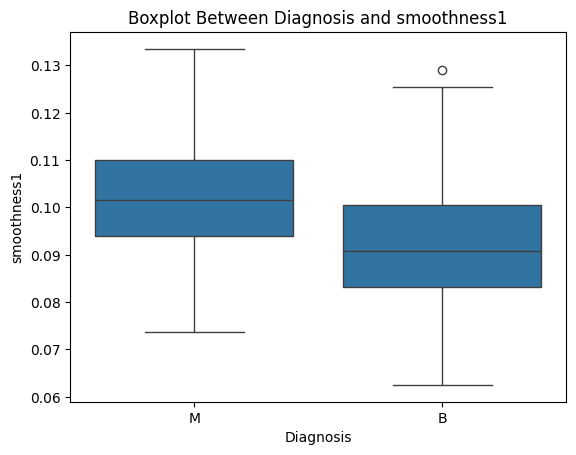

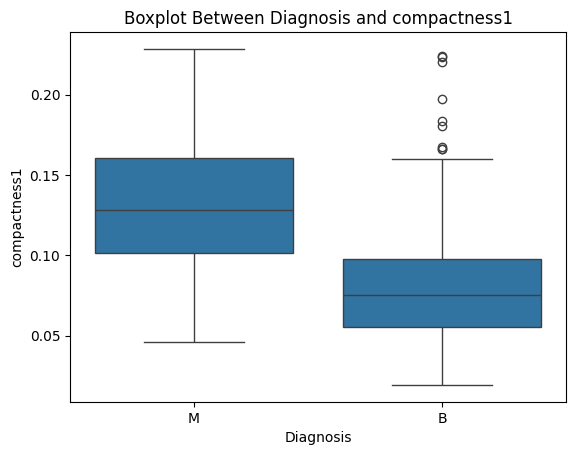

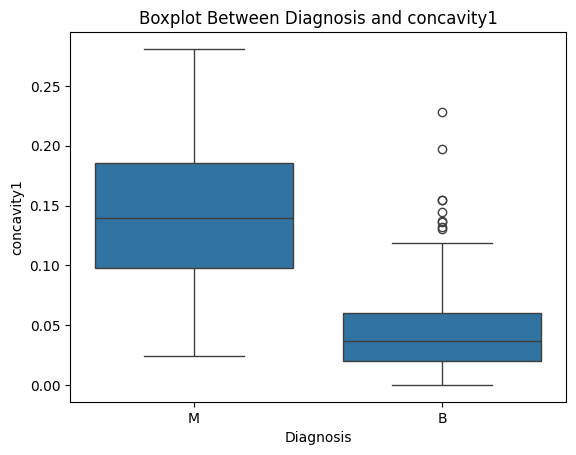

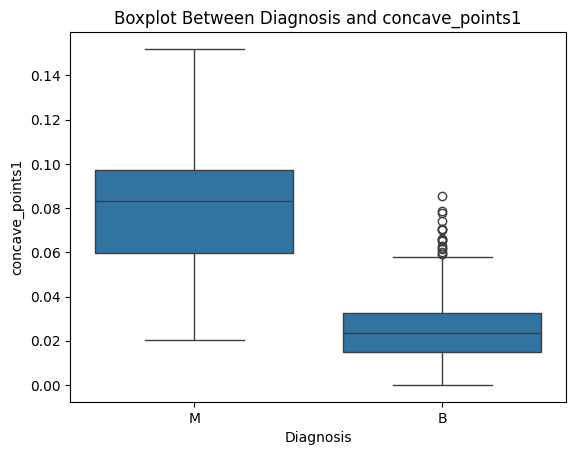

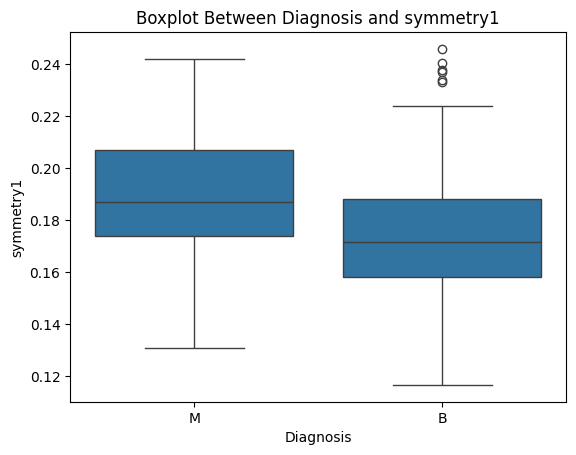

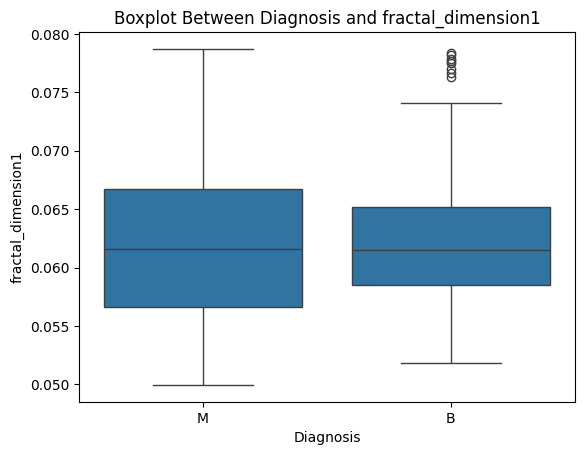

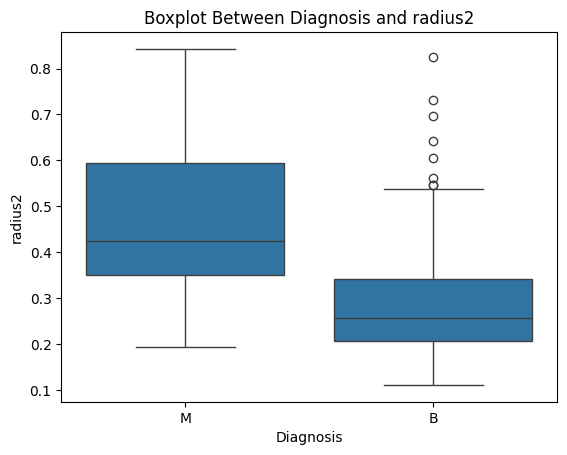

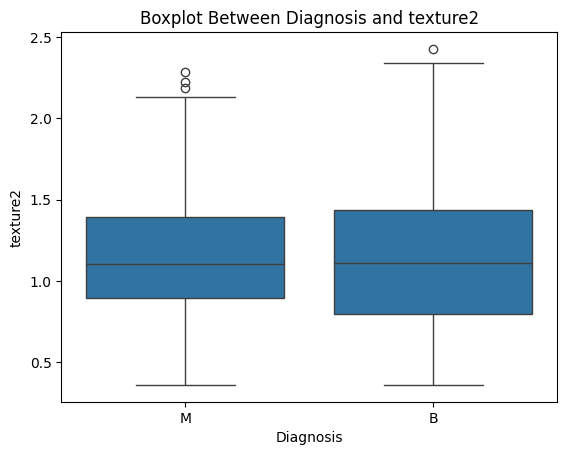

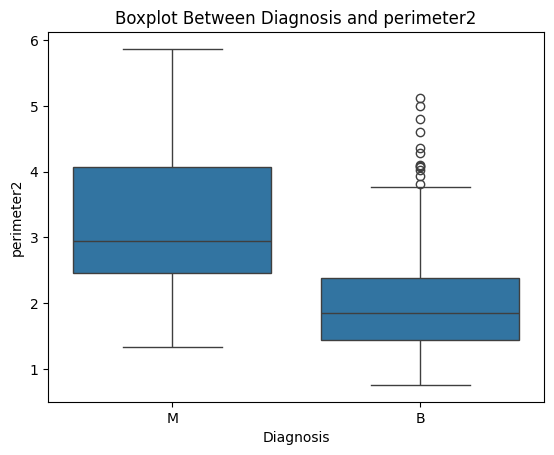

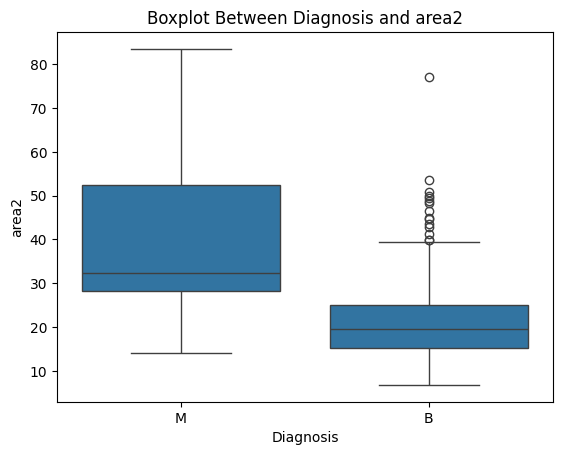

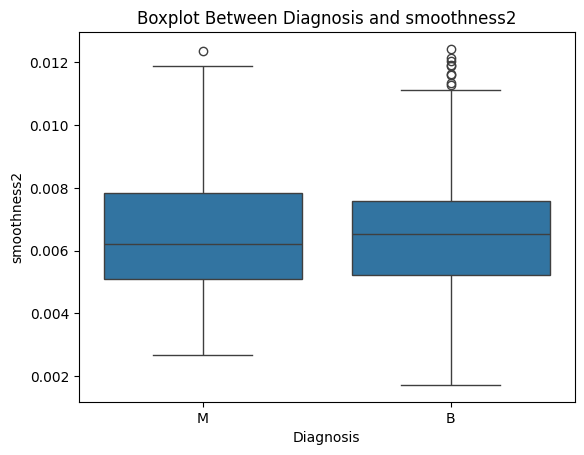

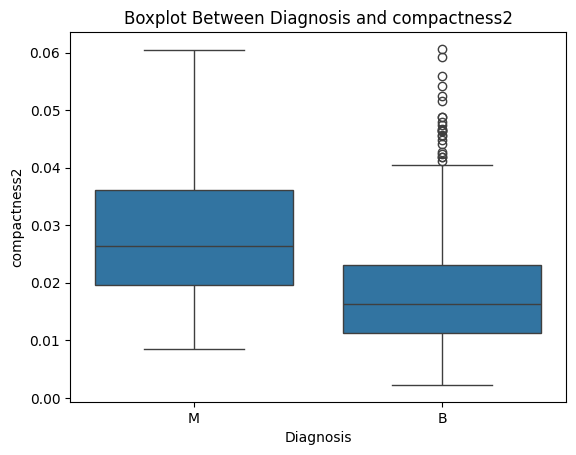

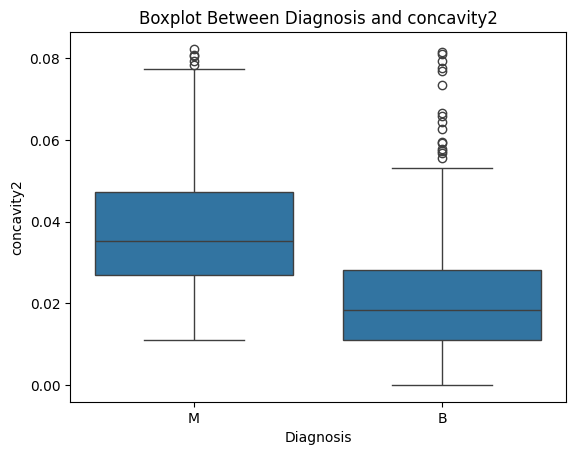

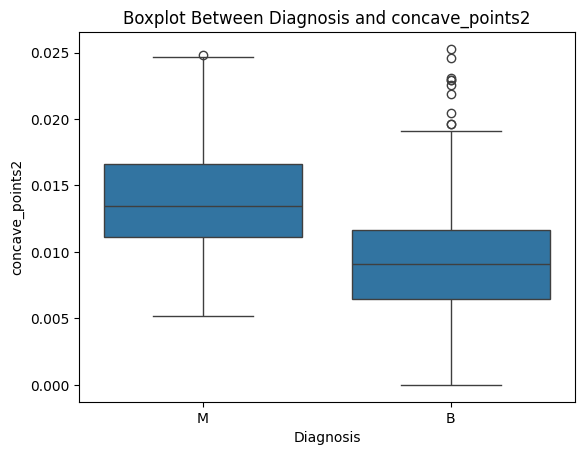

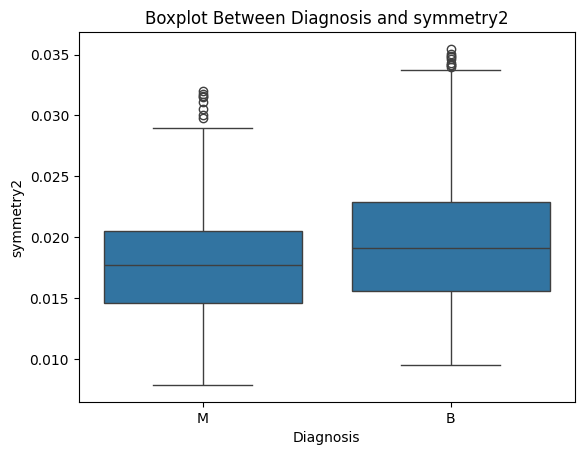

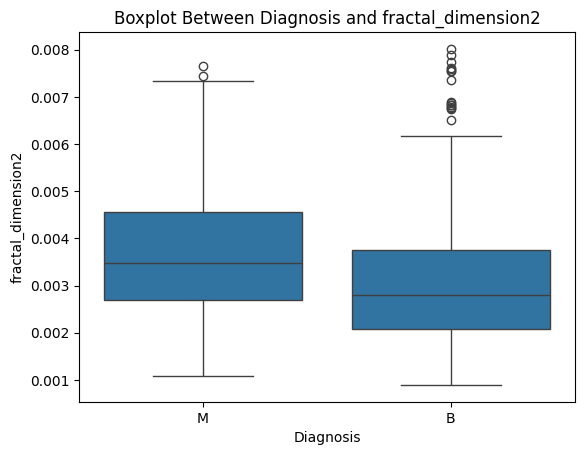

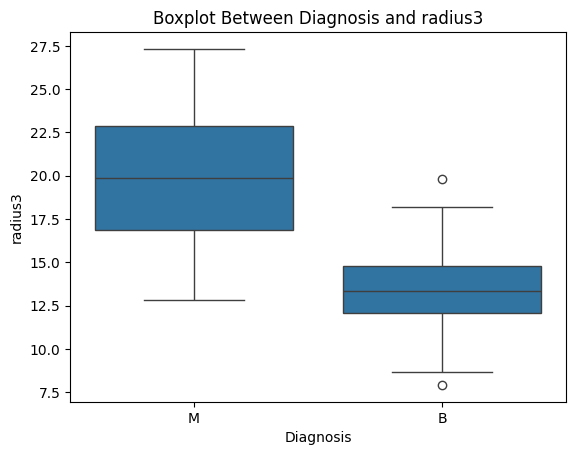

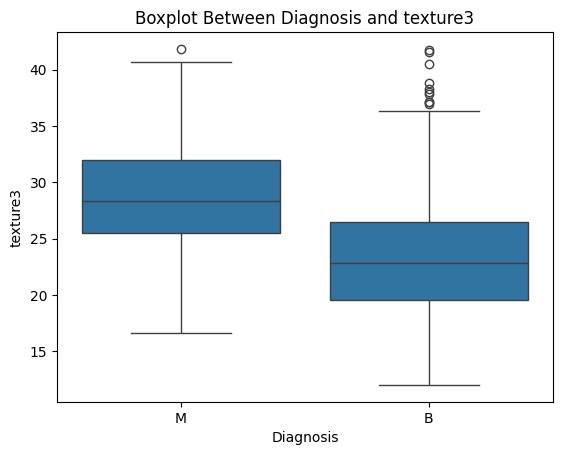

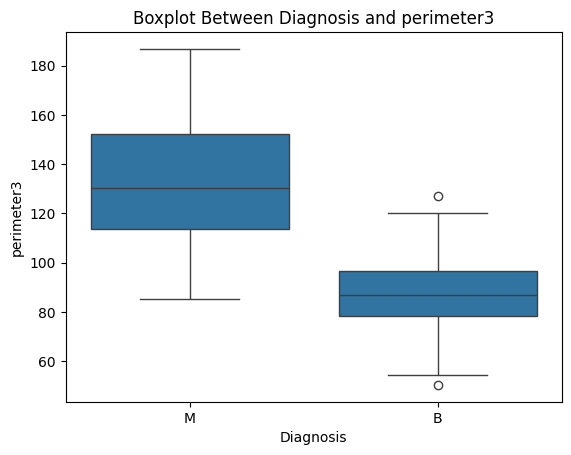

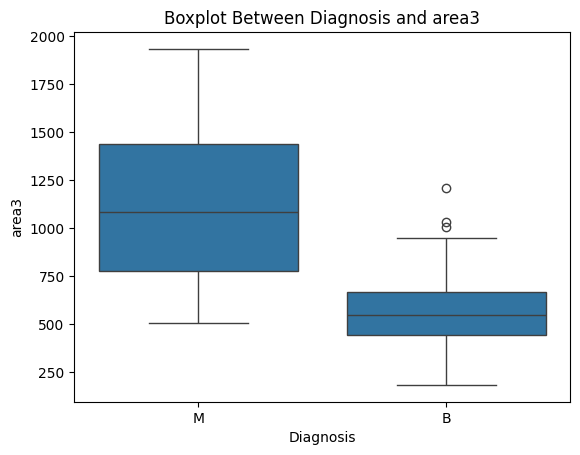

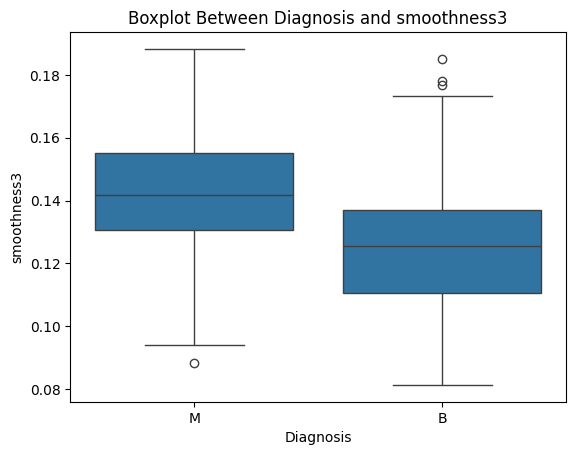

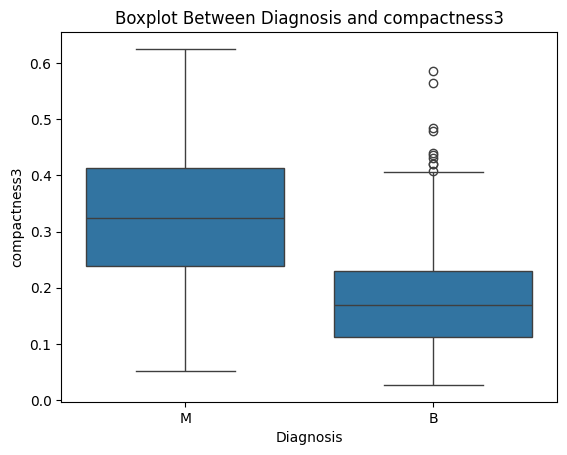

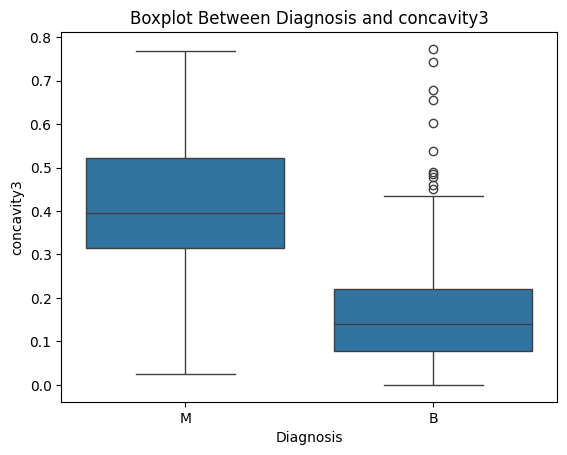

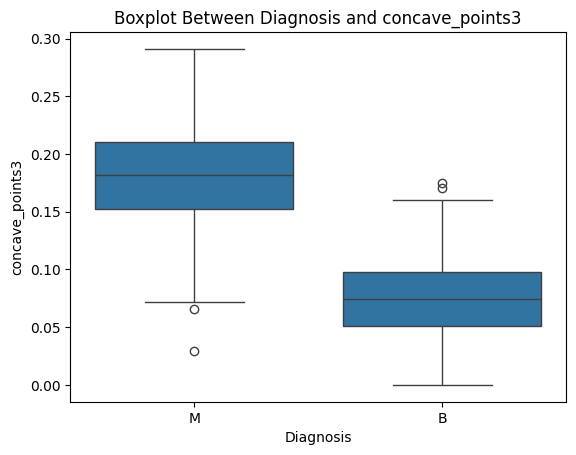

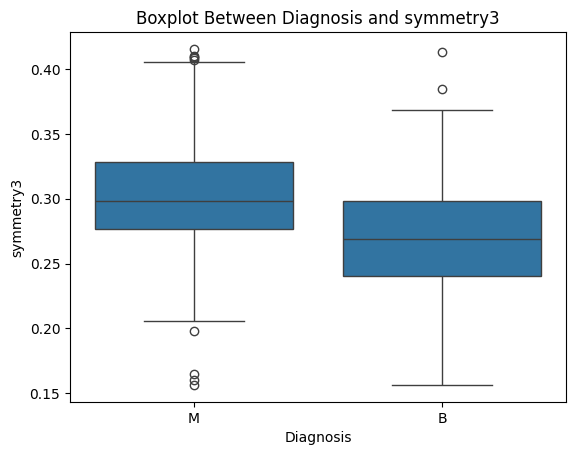

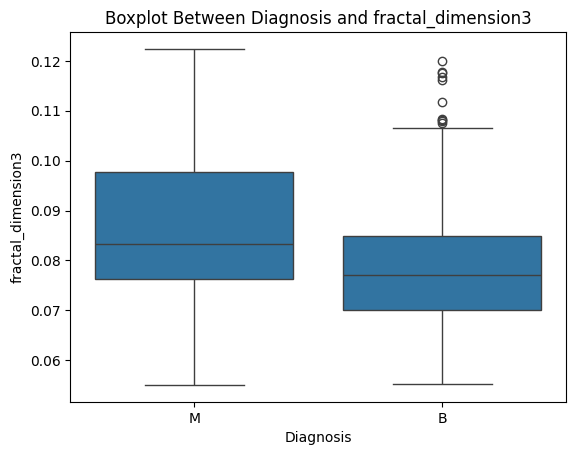

In [24]:
# Boxplot by Target

count = 0

for col in df.columns:
  if count == 30:
    break

  sns.boxplot(x='Diagnosis', y=col, data=df)
  plt.title('Boxplot Between Diagnosis and ' + col)
  plt.show()

  count = count + 1


# **4) Feature Engineering and Selection**

In [25]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

In [26]:
# Features Scaling, Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Remove High Correlated Features

In [27]:
# Use variance inflation factor to identify any significant multi-collinearity
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df_numeric.columns
    vif["VIF"] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]
    return(vif)

calc_vif(df_numeric)

variables          VIF
0              radius1  1746.036345
1             texture1   170.967614
2           perimeter1  1613.210520
3                area1    77.557244
4          smoothness1   229.646780
5         compactness1    40.976812
6           concavity1    23.645657
7      concave_points1    30.033022
8            symmetry1   131.473491
9   fractal_dimension1   297.926164
10             radius2    42.935942
11            texture2    23.710229
12          perimeter2    48.519113
13               area2    12.177366
14         smoothness2    25.046261
15        compactness2    20.753220
16          concavity2    14.918375
17     concave_points2    23.097617
18           symmetry2    29.342316
19  fractal_dimension2    18.823824
20             radius3   592.626704
21            texture3   204.672683
22          perimeter3   489.850338
23               area3    36.802506
24         smoothness3   186.355992
25        compactness3    33.837903
26          concavity3    23.623938
27     concave_points3    50.421086
28           symmetry3   113.969355
29  fractal_dimension3   145.809536

Remove High Correlated Features: (radius1, perimeter1, fractal_dimension1)

## Feature Importance using Mutual Information

In [28]:
feature_names = [col for col in df.columns if col != "Diagnosis"]

In [29]:
# Encoding the Target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

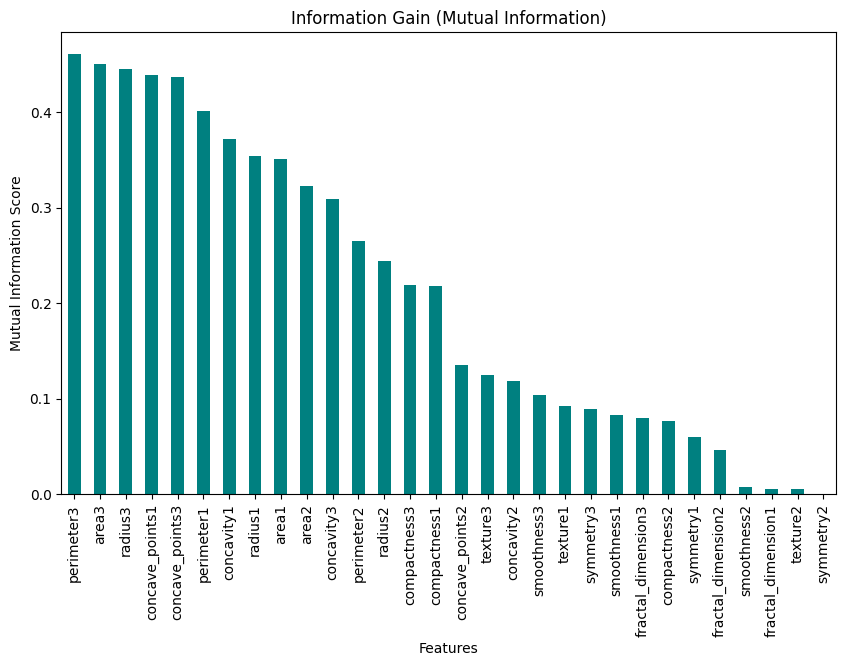

In [30]:
mi_scores = mutual_info_classif(X, y_encoded)
mi_scores = pd.Series(mi_scores, index=feature_names)
mi_scores.sort_values(ascending=False, inplace=True)

# Plot Information Gain
plt.figure(figsize=(10, 6))
mi_scores.plot(kind="bar", color="teal")
plt.title("Information Gain (Mutual Information)")
plt.xlabel("Features")
plt.ylabel("Mutual Information Score")
plt.show()

## Feature Selection using ANOVA

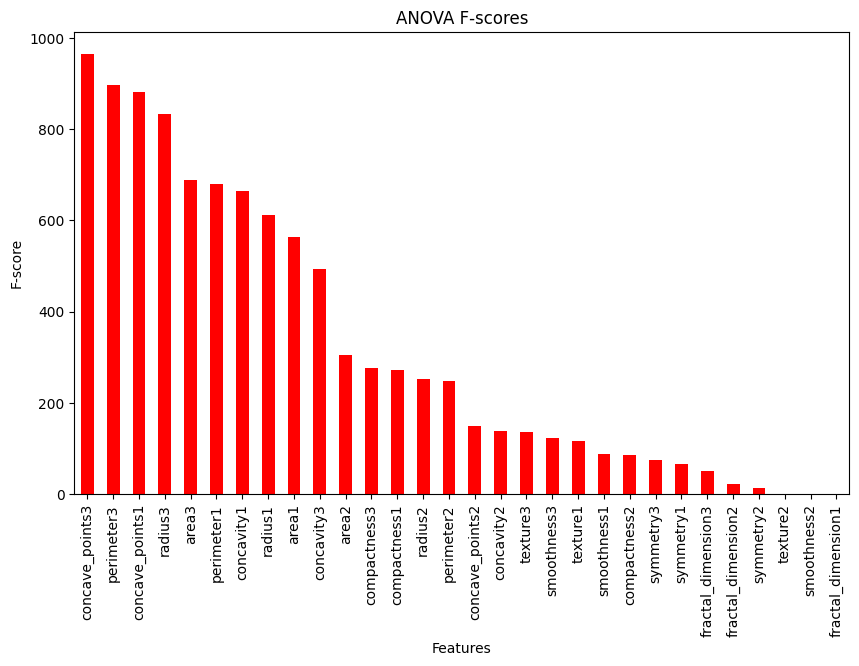

In [31]:
# ANOVA (F-test)
f_scores, _ = f_classif(X, y)  # ANOVA F-test
f_scores = pd.Series(f_scores, index=feature_names)
f_scores.sort_values(ascending=False, inplace=True)

# Plot ANOVA F-scores
plt.figure(figsize=(10, 6))
f_scores.plot(kind="bar", color="red")
plt.title("ANOVA F-scores")
plt.xlabel("Features")
plt.ylabel("F-score")
plt.show()

There is High relationship Between (perimeter3, cnocave_points1, radius3) features and the target. and the Relation between (texture2, smoothness2, symmetry2) is very low

## Feature Selection using Variance Threshold

In [45]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Fit Ridge Logistic Regression
ridge_selector = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', max_iter=1000)
ridge_selector.fit(X_train, y_train)

# Get feature importance based on absolute weights
feature_importance = np.abs(ridge_selector.coef_[0])
important_indices = np.argsort(feature_importance)[::-1][:15]  # top 15 features

# Subset data
selected_features = X_train.columns[important_indices]
X_train_fs = X_train[selected_features]
X_test_fs = X_test[selected_features]

print("Selected top features:", list(selected_features))


Selected top features: ['concavity3', 'concave_points3', 'concavity1', 'texture2', 'radius2', 'concave_points1', 'radius3', 'symmetry3', 'symmetry1', 'compactness1', 'fractal_dimension3', 'compactness3', 'texture1', 'texture3', 'smoothness1']


In [46]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
grid_xgb = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train_fs, y_train)

best_xgb = grid_xgb.best_estimator_
print("Best XGBoost Params:", grid_xgb.best_params_)


Best XGBoost Params: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:15:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


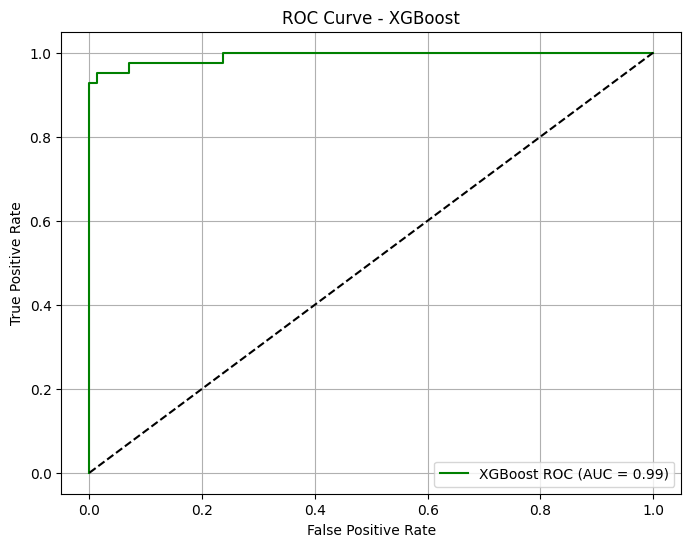

In [47]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob_xgb = best_xgb.predict_proba(X_test_fs)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost ROC (AUC = {roc_auc_xgb:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


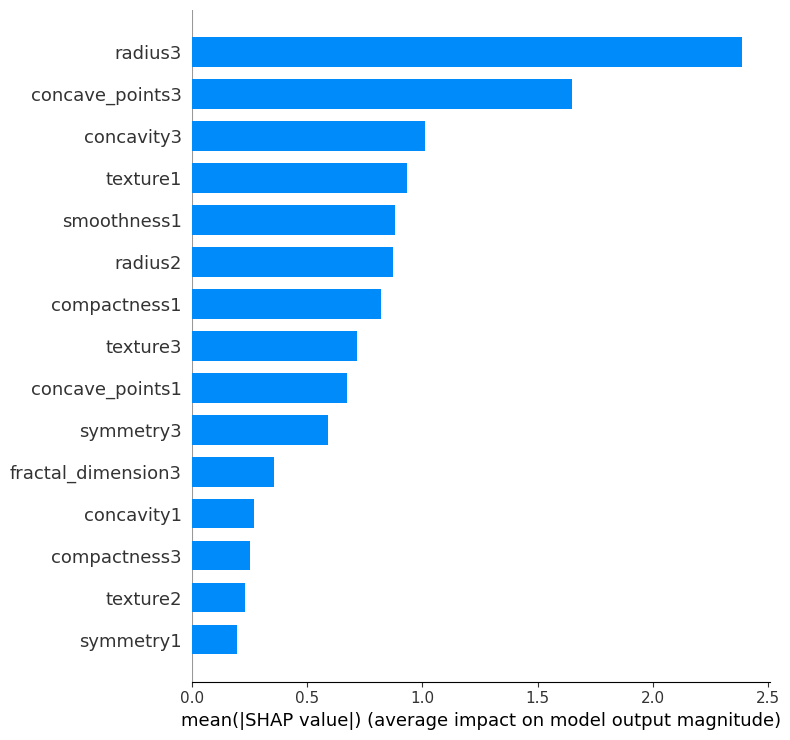

In [48]:
import shap

# SHAP for XGBoost
shap_explainer_xgb = shap.Explainer(best_xgb, X_train_fs)
shap_values_xgb = shap_explainer_xgb(X_test_fs)

# Summary plot
shap.summary_plot(shap_values_xgb, X_test_fs, plot_type="bar")


In [49]:
import lime.lime_tabular

lime_explainer_xgb = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_fs),
    feature_names=selected_features,
    class_names=['Benign', 'Malignant'],
    mode='classification'
)

# Explain one sample
i = 0
exp_xgb = lime_explainer_xgb.explain_instance(X_test_fs.iloc[i].values, best_xgb.predict_proba, num_features=10)
exp_xgb.show_in_notebook(show_table=True)
